Preamble

In [1]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma


from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm

# configure plotting
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline

# Fitting exponential to G

The next step is to fit an exponential function to G(z) for all z. This gives us a quantitative way to measure a charactaristic strain rate for each tw. This is important because creep in these experiments is a transient, unsteady process in time; thus we need some justifiable way to measure and compare velocity profiles between experiments, and to see how creep changes with depth and time. 

The quantity of interest is the efolding timescale Te, the only free parameter in the fit. 

## Loading Data

In [2]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_A'
)

data = np.load('FlatRough_02_14_2022_A_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_A_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_A_Gfit_r2 = data['data2']
FlatRough_02_14_2022_A_map_shape = data['data3']

In [3]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_B'
)

data = np.load('FlatRough_02_14_2022_B_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_B_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_B_Gfit_r2 = data['data2']
FlatRough_02_14_2022_B_map_shape = data['data3']

In [4]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_C'
)

data = np.load('FlatRough_02_14_2022_C_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_C_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_C_Gfit_r2 = data['data2']
FlatRough_02_14_2022_C_map_shape = data['data3']

In [5]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_D'
)

data = np.load('FlatRough_02_14_2022_D_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_D_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_D_Gfit_r2 = data['data2']
FlatRough_02_14_2022_D_map_shape = data['data3']

In [6]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_E'
)

data = np.load('FlatRough_02_14_2022_E_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_E_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_E_Gfit_r2 = data['data2']
FlatRough_02_14_2022_E_map_shape = data['data3']

In [7]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_F'
)

data = np.load('FlatRough_02_14_2022_F_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_F_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_F_Gfit_r2 = data['data2']
FlatRough_02_14_2022_F_map_shape = data['data3']

In [8]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_G'
)

data = np.load('FlatRough_02_14_2022_G_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_G_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_G_Gfit_r2 = data['data2']
FlatRough_02_14_2022_G_map_shape = data['data3']

In [9]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_H'
)

data = np.load('FlatRough_02_14_2022_H_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_H_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_H_Gfit_r2 = data['data2']
FlatRough_02_14_2022_H_map_shape = data['data3']

In [10]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_I'
)

data = np.load('FlatRough_02_14_2022_I_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_I_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_I_Gfit_r2 = data['data2']
FlatRough_02_14_2022_I_map_shape = data['data3']

In [11]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022/02_14_2022_J'
)

data = np.load('FlatRough_02_14_2022_J_metapixel_ensemble_Gfits.npz',allow_pickle=True)

FlatRough_02_14_2022_J_Gfit_coeffs  = data['data1']
FlatRough_02_14_2022_J_Gfit_r2 = data['data2']
FlatRough_02_14_2022_J_map_shape = data['data3']

## Depth averaged relaxation times

In [12]:
def tau_maps(Gfit_coeffs,map_shape):

    tws = Gfit_coeffs.shape[0]

    tau_maps = [[] for _ in range(tws)]
    mean_depth_avg = [[] for _ in range(tws)]
    var_depth_avg = [[] for _ in range(tws)]

    for tw in range(tws):
        temp_map = np.reshape(Gfit_coeffs[tw][0],map_shape)
        mean_depth_avg[tw] = np.nanmean(temp_map,axis = 1)
        var_depth_avg[tw] = np.nanvar(temp_map,axis = 1)
        tau_maps[tw] = temp_map
        
        y = tau_maps[0].shape[0]
        y_max = np.nanmax(y)
        y_min = 0

        # this is the depth, in metapixels
        z = np.arange(.5,(y_max-y_min),1)
        #depth in pixels
        z = z*6
        #depth in meters
        z = z*5.39e-5

    return tau_maps,mean_depth_avg,var_depth_avg,z

## profiles for each experiment

In [13]:
FlatRough_02_14_2022_A_tau_maps, FlatRough_02_14_2022_A_tau_profiles, FlatRough_02_14_2022_A_var_depth_avg, FlatRough_02_14_2022_A_z = tau_maps(
    FlatRough_02_14_2022_A_Gfit_coeffs, FlatRough_02_14_2022_A_map_shape)

In [14]:
FlatRough_02_14_2022_B_tau_maps, FlatRough_02_14_2022_B_tau_profiles, FlatRough_02_14_2022_B_var_depth_avg, FlatRough_02_14_2022_B_z = tau_maps(
    FlatRough_02_14_2022_B_Gfit_coeffs, FlatRough_02_14_2022_B_map_shape)

In [15]:
FlatRough_02_14_2022_C_tau_maps, FlatRough_02_14_2022_C_tau_profiles, FlatRough_02_14_2022_C_var_depth_avg, FlatRough_02_14_2022_C_z = tau_maps(
    FlatRough_02_14_2022_C_Gfit_coeffs, FlatRough_02_14_2022_C_map_shape)

In [16]:
FlatRough_02_14_2022_D_tau_maps, FlatRough_02_14_2022_D_tau_profiles, FlatRough_02_14_2022_D_var_depth_avg, FlatRough_02_14_2022_D_z = tau_maps(
    FlatRough_02_14_2022_D_Gfit_coeffs, FlatRough_02_14_2022_D_map_shape)

In [17]:
FlatRough_02_14_2022_E_tau_maps, FlatRough_02_14_2022_E_tau_profiles, FlatRough_02_14_2022_E_var_depth_avg, FlatRough_02_14_2022_E_z = tau_maps(
    FlatRough_02_14_2022_E_Gfit_coeffs, FlatRough_02_14_2022_E_map_shape)

In [18]:
FlatRough_02_14_2022_F_tau_maps, FlatRough_02_14_2022_F_tau_profiles, FlatRough_02_14_2022_F_var_depth_avg, FlatRough_02_14_2022_F_z = tau_maps(
    FlatRough_02_14_2022_F_Gfit_coeffs, FlatRough_02_14_2022_F_map_shape)

In [19]:
FlatRough_02_14_2022_G_tau_maps, FlatRough_02_14_2022_G_tau_profiles, FlatRough_02_14_2022_G_var_depth_avg, FlatRough_02_14_2022_G_z = tau_maps(
    FlatRough_02_14_2022_G_Gfit_coeffs, FlatRough_02_14_2022_G_map_shape)

In [20]:
FlatRough_02_14_2022_H_tau_maps, FlatRough_02_14_2022_H_tau_profiles, FlatRough_02_14_2022_H_var_depth_avg, FlatRough_02_14_2022_H_z = tau_maps(
    FlatRough_02_14_2022_H_Gfit_coeffs, FlatRough_02_14_2022_H_map_shape)

In [21]:
FlatRough_02_14_2022_I_tau_maps, FlatRough_02_14_2022_I_tau_profiles, FlatRough_02_14_2022_I_var_depth_avg, FlatRough_02_14_2022_I_z = tau_maps(
    FlatRough_02_14_2022_I_Gfit_coeffs, FlatRough_02_14_2022_I_map_shape)

In [22]:
FlatRough_02_14_2022_J_tau_maps, FlatRough_02_14_2022_J_tau_profiles, FlatRough_02_14_2022_J_var_depth_avg, FlatRough_02_14_2022_J_z = tau_maps(
    FlatRough_02_14_2022_J_Gfit_coeffs, FlatRough_02_14_2022_J_map_shape)

# Plotting profiles

In [23]:
l = 3.3 * 100000
c = ((8*np.pi)*(np.sqrt(2/5))*l)/633
G = 1/np.exp(1)

#This is is the strain value that is equivalent to 1/e G
ϵ_efold = -(np.log(G)/c) 
# andrade_rates = ϵ_efold / tau

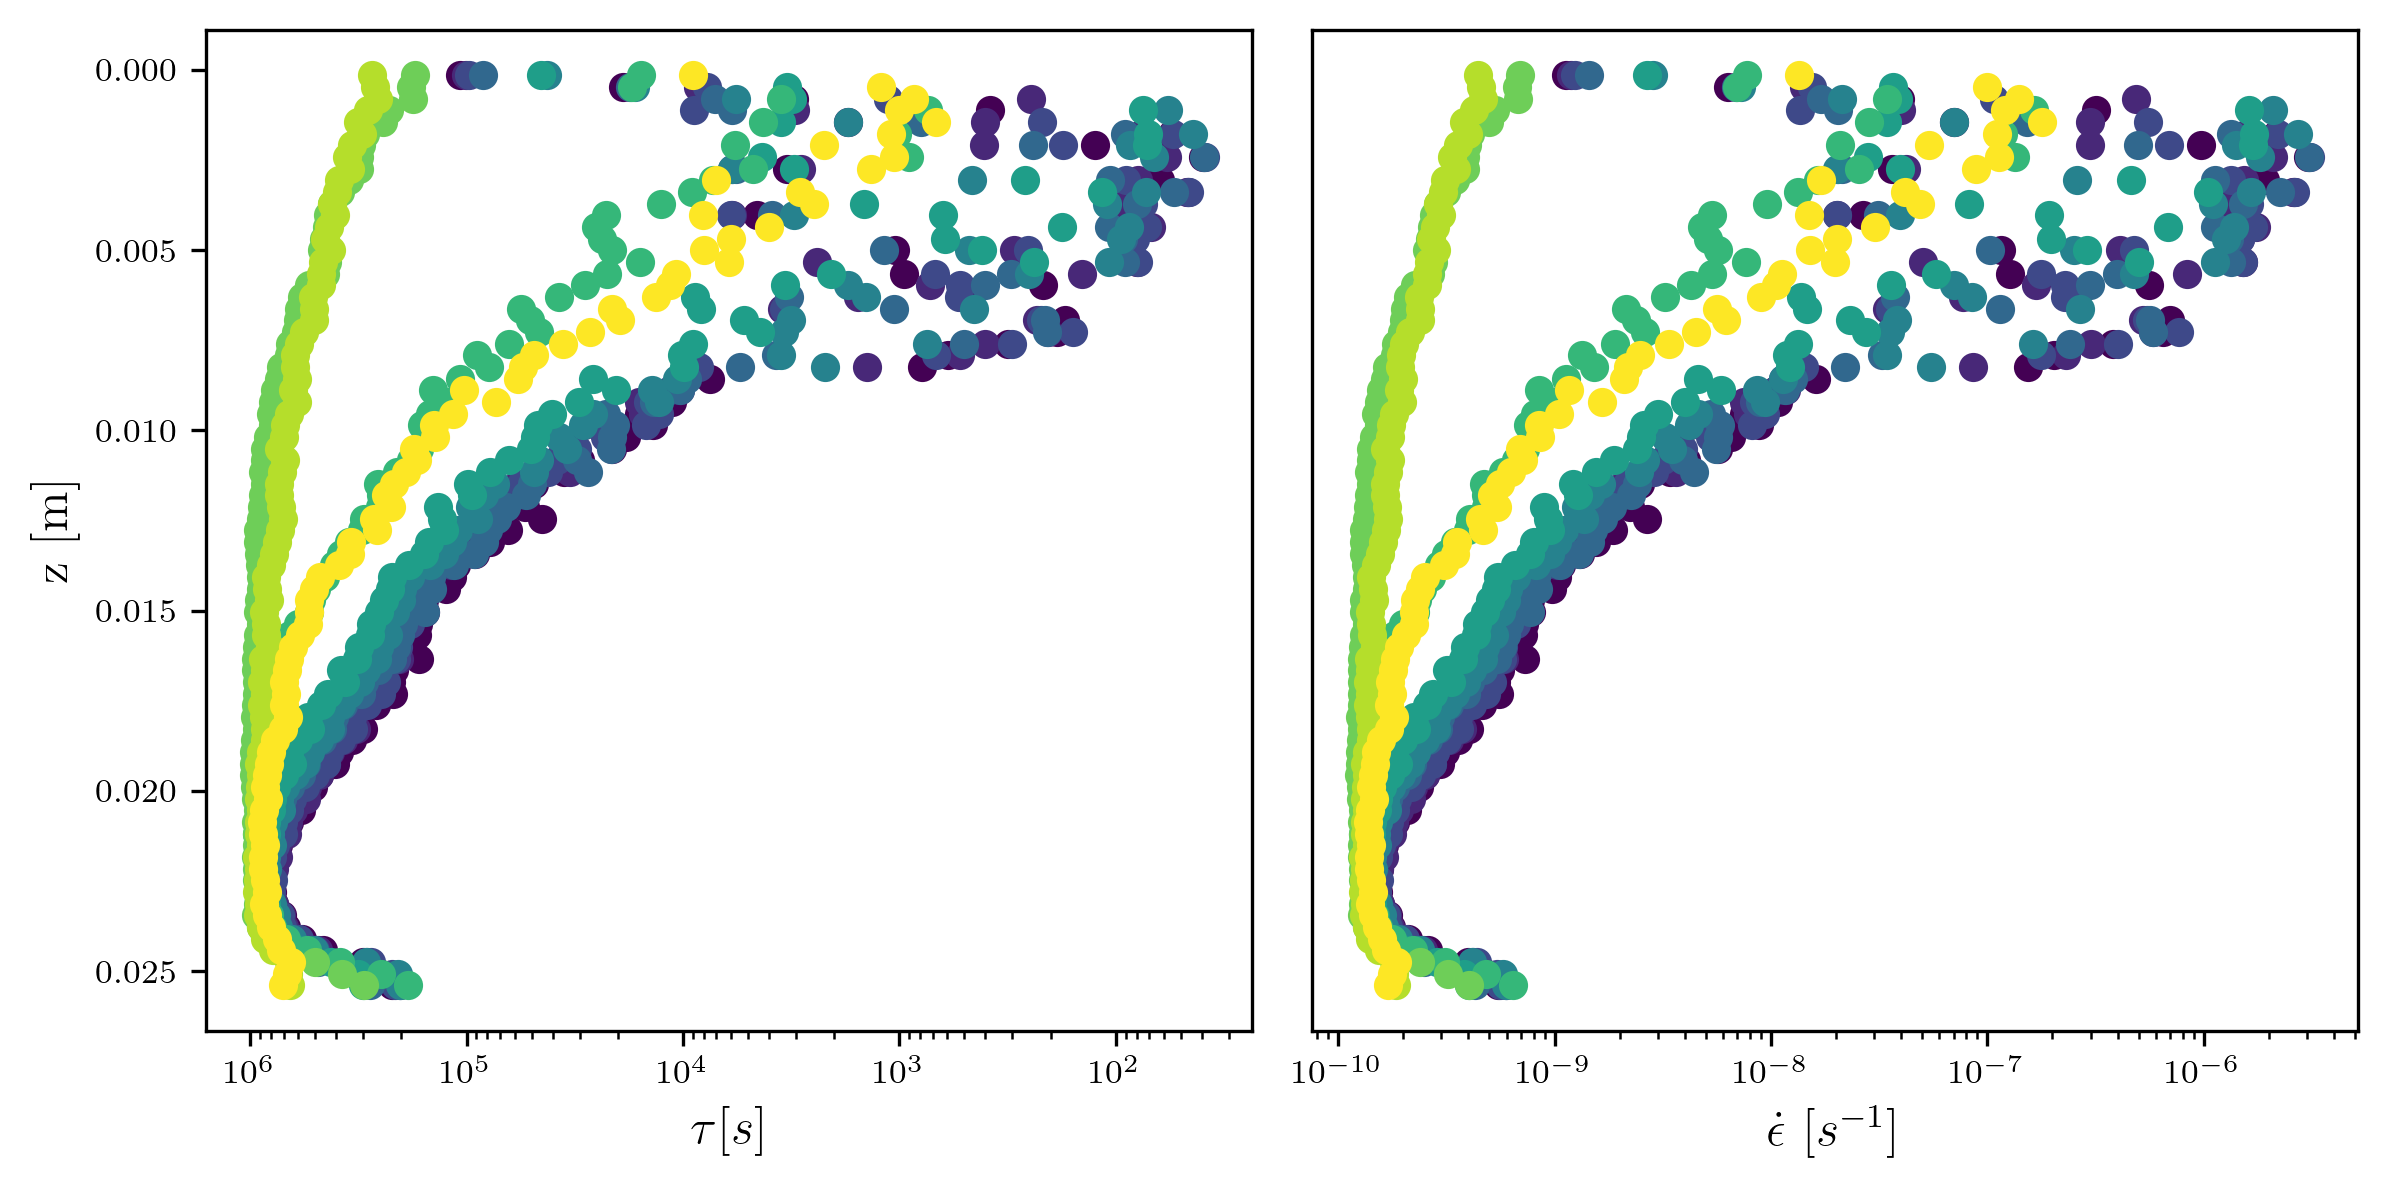

In [24]:
fs = 12
ms = 6
y = 10

time_cumulative = list(np.logspace(1, 9, num=9, base=2))
time_cumulative.insert(0, 0)

labels = list(time_cumulative)

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
########################################################################################################################
color = iter(cm.viridis(np.linspace(0, 1, y)))

for tw in range(y):
    c = next(color)
    #     strain_profile = np.true_divide(ϵ_efold , FlatSmooth_02_11_2022_B_tau_profiles[tw])
    ax1.plot(FlatRough_02_14_2022_F_tau_profiles[tw],
             FlatRough_02_14_2022_F_z,
             'o',
             color=c,
             markersize=ms,
             alpha=1)

ax1.invert_yaxis()
ax1.invert_xaxis()

ax1.set_xscale('log')

ax1.set_xlabel(r'$\tau [s]$', fontsize=fs)
ax1.set_ylabel(r'z [m]', fontsize=fs)
########################################################################################################################
color = iter(cm.viridis(np.linspace(0, 1, y)))

for tw in range(y):
    c = next(color)
    strain_profile = np.true_divide(ϵ_efold,
                                    FlatRough_02_14_2022_F_tau_profiles[tw])
    ax2.plot(strain_profile,
             FlatRough_02_14_2022_F_z,
             'o',
             color=c,
             markersize=ms,
             alpha=1)

ax2.invert_yaxis()
ax2.set_yticks([])
ax2.set_xscale('log')
ax2.set_xlabel(r'$\dot{\epsilon}$ [$s^{-1}$]', fontsize=fs)

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Boundaries/FlatSmooth/FlatSmooth_02_11_2022_B_profiles_stretchedexp.pdf', bbox_inches='tight')

## Single profile

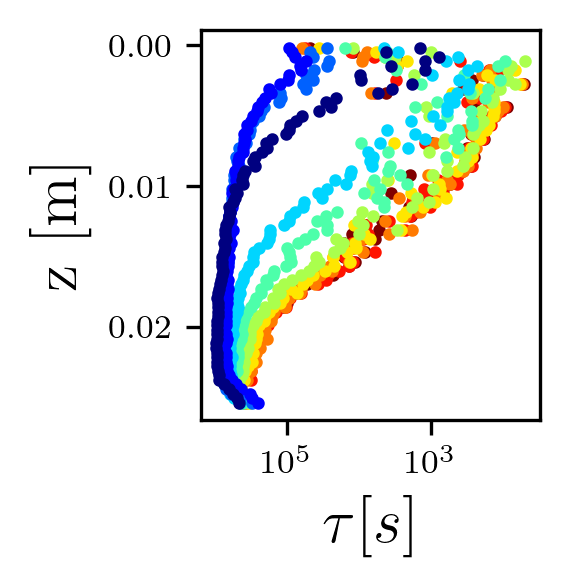

In [25]:
fs = 15
y = 10

############################################################
time_cumulative = list(np.logspace(1, 9, num=9, base=2))
time_cumulative.insert(0, 0)

labels = list(time_cumulative)

color = iter(cm.jet_r(np.linspace(0, 1, y)))
time = np.arange(1, 101, 1)

fig = plt.figure(figsize=(2, 2))
ax1 = plt.subplot(111)

for tw in range(y):
    c = next(color)
    #     strain_profile = np.true_divide(strain , tau_profiless[tw])
    ax1.plot(FlatRough_02_14_2022_J_tau_profiles[tw],
             FlatRough_02_14_2022_J_z,
             'o',
             color=c,
             markersize=2,
             alpha=1)

ax1.invert_yaxis()
ax1.invert_xaxis()

ax1.set_xscale('log')

ax1.set_xlabel(r'$\tau [s]$', fontsize=fs)
ax1.set_ylabel(r'z [m]', fontsize=fs)

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Boundaries/FlatRough/FlatRough_02_14_2022_B_profiles_stretchedexp.pdf', bbox_inches='tight')

## All profiles 

In [26]:
def plot_timescale_profile(tau_profiles,z,axes):
    
    fs = 15
    y = 10
    ax_profile = axes
    ############################################################
    time_cumulative = list(np.logspace(1, 9, num=9, base=2))
    time_cumulative.insert(0, 0)
    labels = list(time_cumulative)

    color = iter(cm.viridis(np.linspace(0, 1, y)))


    for tw in range(y):
        c = next(color)
        strain_profile = np.true_divide(ϵ_efold  , tau_profiles[tw])
        ax_profile.plot(strain_profile,z, 'o', color=c, markersize=2, alpha=1)

    ax_profile.invert_yaxis()
    ax_profile.set_xscale('log')
#     ax_profile.invert_xaxis()

#     ax_profile.set_xlabel(r'$\dot{\epsilon}$ [$s^{-1}$]', fontsize=fs)
#     ax_profile.set_ylabel(r'z [m]', fontsize=fs)


    return ax_profile

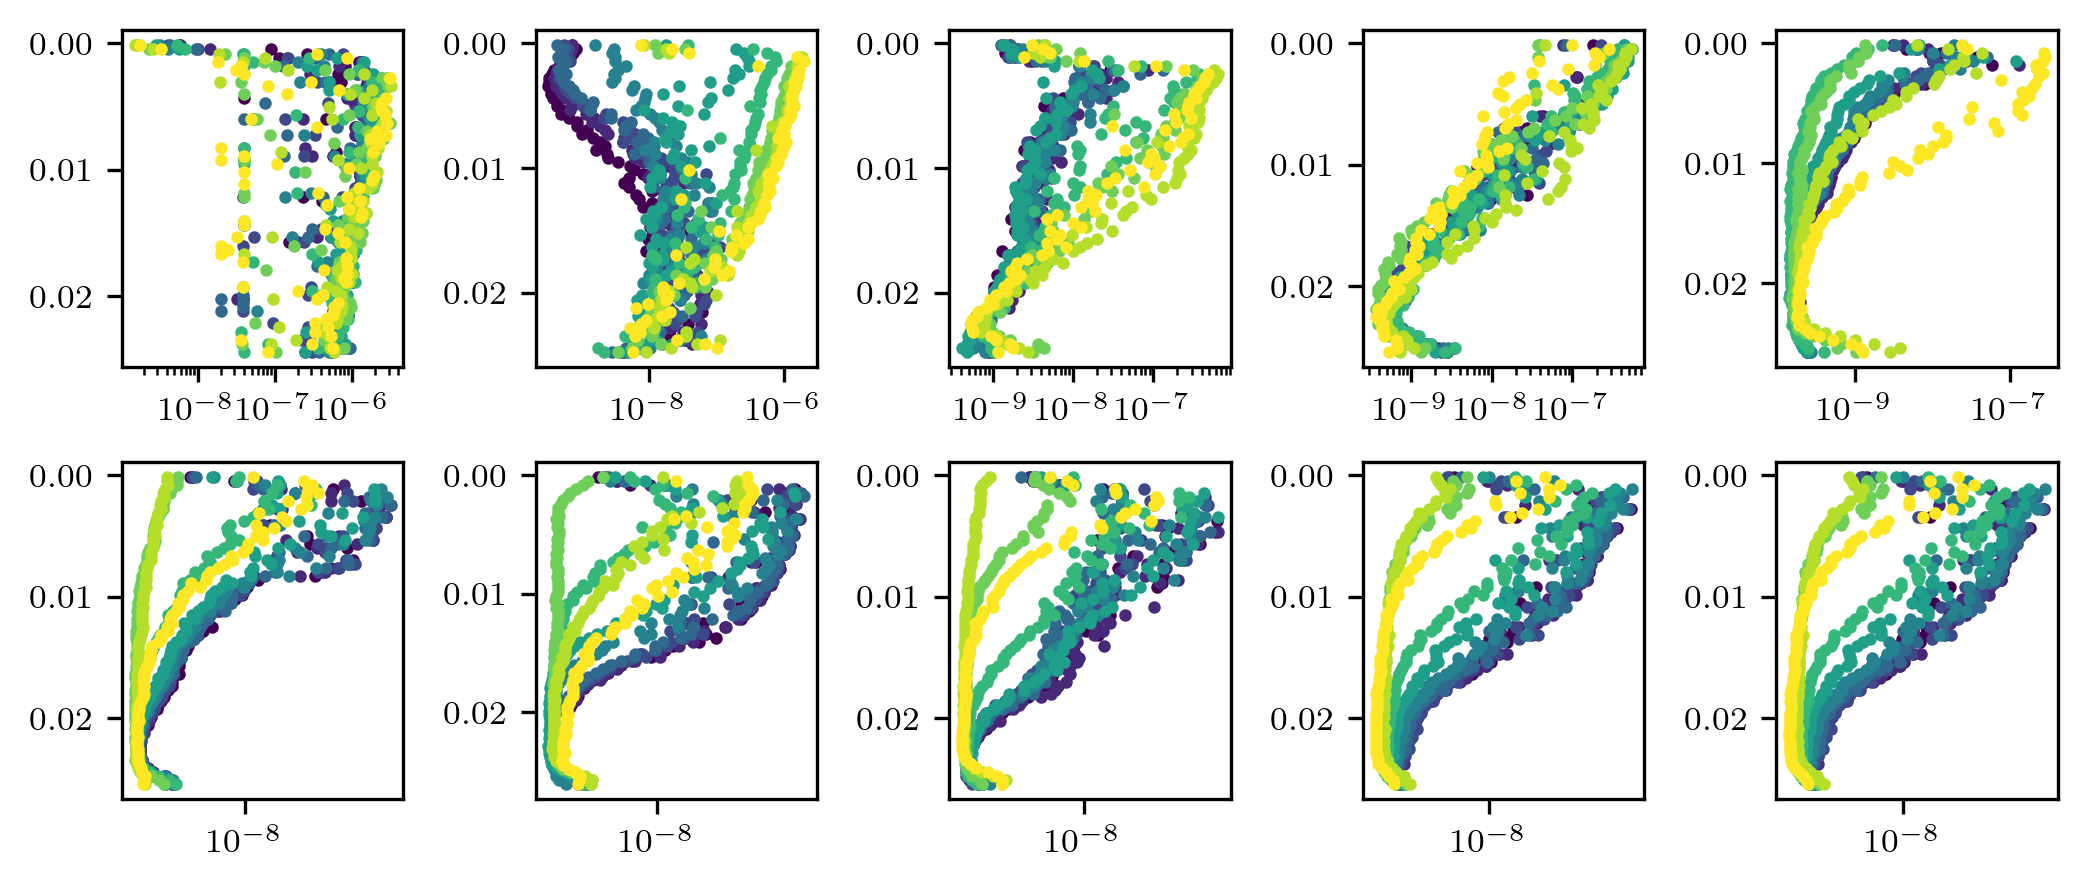

In [27]:
# Display results
fig = plt.figure(figsize=(7, 3))
axes = np.zeros((2, 5), dtype=np.object)

axes[0, 0] = plt.subplot(2, 5, 1)
axes[0, 1] = plt.subplot(2, 5, 2)
axes[0, 2] = plt.subplot(2, 5, 3)
axes[0, 3] = plt.subplot(2, 5, 4)
axes[0, 4] = plt.subplot(2, 5, 5)
axes[1, 0] = plt.subplot(2, 5, 6)
axes[1, 1] = plt.subplot(2, 5, 7)
axes[1, 2] = plt.subplot(2, 5, 8)
axes[1, 3] = plt.subplot(2, 5, 9)
axes[1, 4] = plt.subplot(2, 5, 10)

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_A_tau_profiles,
                          FlatRough_02_14_2022_A_z, axes[0, 0])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_B_tau_profiles,
                          FlatRough_02_14_2022_B_z, axes[0, 1])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_C_tau_profiles,
                          FlatRough_02_14_2022_C_z, axes[0, 2])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_D_tau_profiles,
                          FlatRough_02_14_2022_D_z, axes[0, 3])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_E_tau_profiles,
                          FlatRough_02_14_2022_E_z, axes[0, 4])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_F_tau_profiles,
                          FlatRough_02_14_2022_F_z, axes[1, 0])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_G_tau_profiles,
                          FlatRough_02_14_2022_G_z, axes[1, 1])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_H_tau_profiles,
                          FlatRough_02_14_2022_H_z, axes[1, 2])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_I_tau_profiles,
                          FlatRough_02_14_2022_I_z, axes[1, 3])

ax_profile = plot_timescale_profile(FlatRough_02_14_2022_J_tau_profiles,
                          FlatRough_02_14_2022_J_z, axes[1, 4])

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/MaterialsBoundaries/Materials/FlatRough_02_14_2022_timescaleprofiles.png', bbox_inches='tight')

## Mapping timescale profiles to strain rate profiles

In [28]:
l = 3.3 * 100000
c = ((8 * np.pi) * (np.sqrt(2 / 5)) * l) / 633
G = 1 / np.exp(1)

#This is is the strain value that is equivalent to 1/e G
ϵ_efold = -(np.log(G) / c)
# andrade_rates = ϵ_efold / tau

def tau_to_ϵdot(tau_profiles):

    tau_profiles = np.asarray(tau_profiles)
    tws = tau_profiles.shape[0]
    ϵdot_profiles = [[] for _ in range(tws)]

    for tw in range(tws):
        ϵdot_profiles[tw] = np.true_divide(ϵ_efold, tau_profiles[tw])
    
    ϵdot_profiles = np.asarray(ϵdot_profiles)
    
    return ϵdot_profiles

In [29]:
FlatRough_02_14_2022_A_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_A_tau_profiles)
FlatRough_02_14_2022_B_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_B_tau_profiles)
FlatRough_02_14_2022_C_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_C_tau_profiles)
FlatRough_02_14_2022_D_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_D_tau_profiles)
FlatRough_02_14_2022_E_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_E_tau_profiles)
FlatRough_02_14_2022_F_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_F_tau_profiles)
FlatRough_02_14_2022_G_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_G_tau_profiles)
FlatRough_02_14_2022_H_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_H_tau_profiles)
FlatRough_02_14_2022_I_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_I_tau_profiles)
FlatRough_02_14_2022_J_ϵdot_profiles = tau_to_ϵdot(FlatRough_02_14_2022_J_tau_profiles)

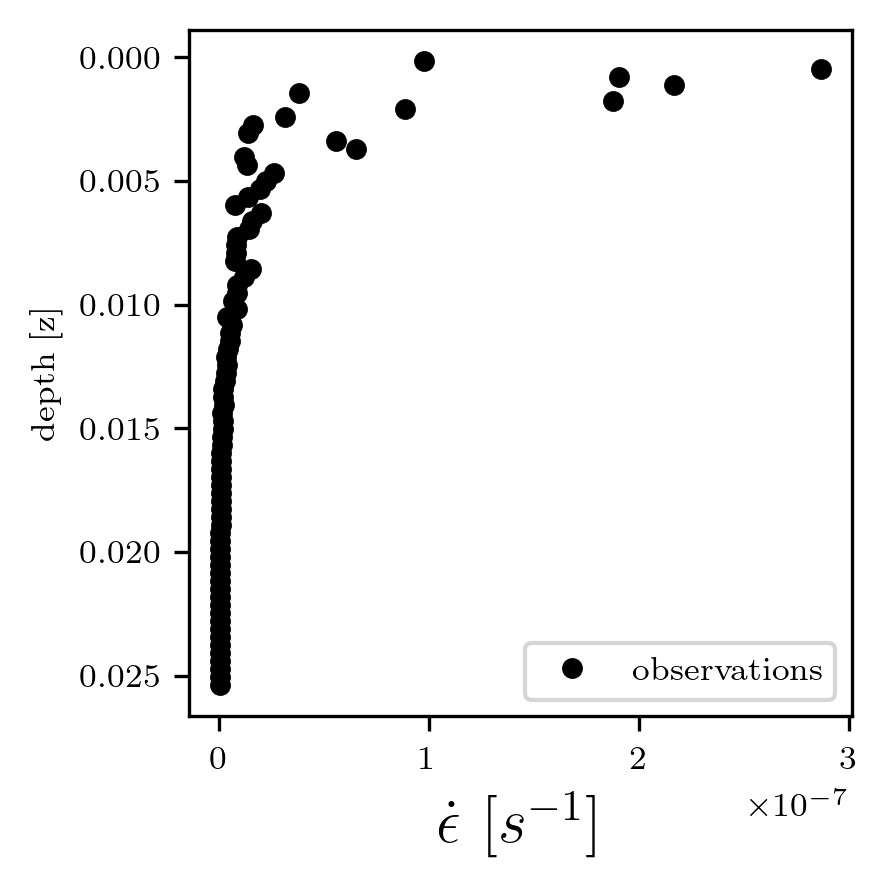

In [30]:
ms = 4
lw = 2

fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot(111)

ax1.plot(FlatRough_02_14_2022_D_ϵdot_profiles[9],
         FlatRough_02_14_2022_D_z,
         'ok',
         markersize=ms,
         label='observations')

ax1.invert_yaxis()

# ax1.set_xscale('log')
# ax1.set_yscale('log')

ax1.set_xlabel(r'$\dot{\epsilon}$ [$s^{-1}$]', fontsize=fs)
ax1.set_ylabel('depth [z]')
ax1.legend()

plt.tight_layout()

## Inertial number

In [31]:
def calculate_I(profile, z):
    #because all profiles are calculated within a 1-second window, the profile itself is the strain-rate profile.
    slope = np.deg2rad(30)
    γ_rate = profile
    γ_z = z
    d = 1e-4
    g = 9.8
    rho = 2650
    phi = 0.6
    alpha = 0.1
    Po = alpha * rho * g * np.cos(slope) * d
    P = rho * g * np.cos(slope) * z * phi + Po
    I = (γ_rate * d) / np.sqrt(P / rho)
    return I

In [32]:

def ϵdot_to_I(ϵdot_profile,z):

    ϵdot_profile = np.asarray(ϵdot_profile)
    tws = ϵdot_profile.shape[0]
    I_profiles = [[] for _ in range(tws)]

    for tw in range(tws):
        ϵdot_profile_temp =ϵdot_profile[tw]
        I_profiles[tw] = calculate_I(ϵdot_profile_temp,z)
    
    I_profiles = np.asarray(I_profiles)
    
    return I_profiles

In [33]:
FlatRough_02_14_2022_A_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_A_ϵdot_profiles,FlatRough_02_14_2022_A_z)
FlatRough_02_14_2022_B_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_B_ϵdot_profiles,FlatRough_02_14_2022_B_z)
FlatRough_02_14_2022_C_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_C_ϵdot_profiles,FlatRough_02_14_2022_C_z)
FlatRough_02_14_2022_D_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_D_ϵdot_profiles,FlatRough_02_14_2022_D_z)
FlatRough_02_14_2022_E_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_E_ϵdot_profiles,FlatRough_02_14_2022_E_z)
FlatRough_02_14_2022_F_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_F_ϵdot_profiles,FlatRough_02_14_2022_F_z)
FlatRough_02_14_2022_G_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_G_ϵdot_profiles,FlatRough_02_14_2022_G_z)
FlatRough_02_14_2022_H_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_H_ϵdot_profiles,FlatRough_02_14_2022_H_z)
FlatRough_02_14_2022_I_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_I_ϵdot_profiles,FlatRough_02_14_2022_I_z)
FlatRough_02_14_2022_J_I_profiles = ϵdot_to_I(FlatRough_02_14_2022_J_ϵdot_profiles,FlatRough_02_14_2022_J_z)

## Plotting 

In [34]:
def plot_I_profile(I_profile,z,axes):
    
    fs = 15
    y = 10
    ax_profile = axes
    ############################################################
    time_cumulative = list(np.logspace(1, 9, num=9, base=2))
    time_cumulative.insert(0, 0)
    labels = list(time_cumulative)

    color = iter(cm.viridis(np.linspace(0, 1, y)))


    for tw in range(y):
        c = next(color)
        ax_profile.plot(I_profile[tw],z, 'o', color=c, markersize=2, alpha=1)

    ax_profile.invert_yaxis()
    ax_profile.set_xscale('log')
#     ax_profile.invert_xaxis()

#     ax_profile.set_xlabel(r'$\dot{\epsilon}$ [$s^{-1}$]', fontsize=fs)
#     ax_profile.set_ylabel(r'z [m]', fontsize=fs)


    return ax_profile

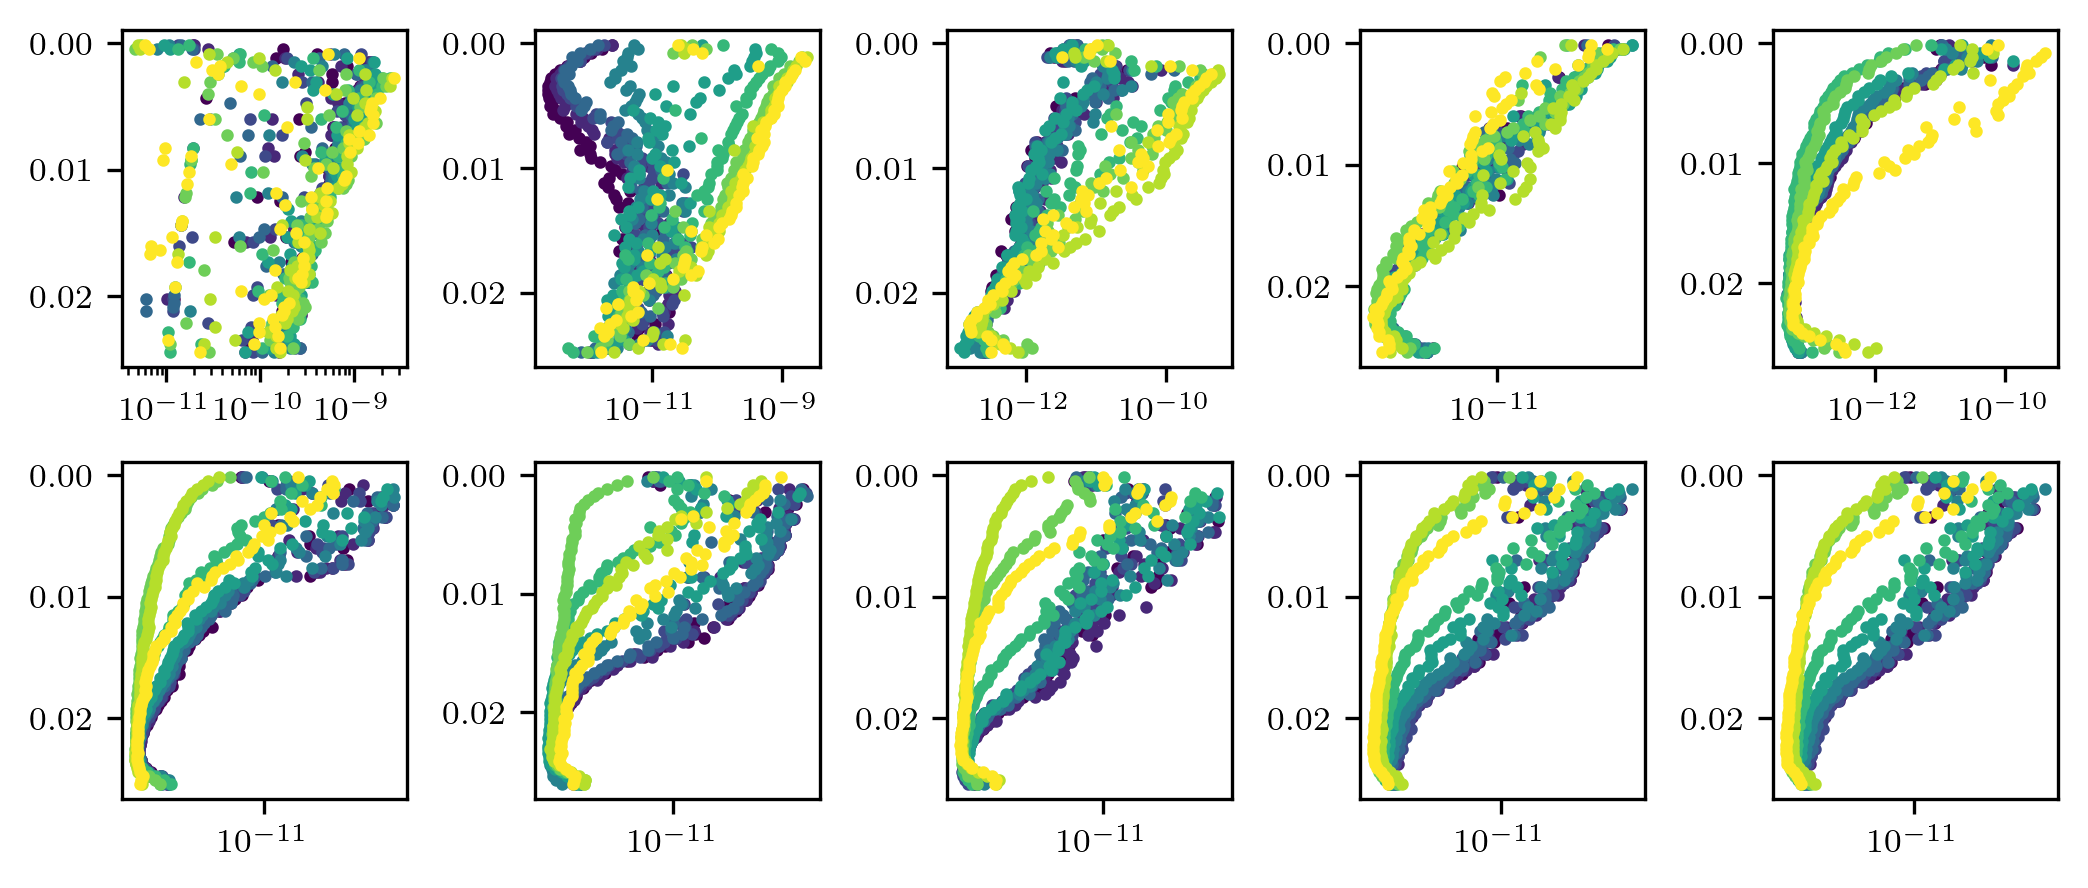

In [35]:
# Display results
fig = plt.figure(figsize=(7, 3))
axes = np.zeros((2, 5), dtype=np.object)

axes[0, 0] = plt.subplot(2, 5, 1)
axes[0, 1] = plt.subplot(2, 5, 2)
axes[0, 2] = plt.subplot(2, 5, 3)
axes[0, 3] = plt.subplot(2, 5, 4)
axes[0, 4] = plt.subplot(2, 5, 5)
axes[1, 0] = plt.subplot(2, 5, 6)
axes[1, 1] = plt.subplot(2, 5, 7)
axes[1, 2] = plt.subplot(2, 5, 8)
axes[1, 3] = plt.subplot(2, 5, 9)
axes[1, 4] = plt.subplot(2, 5, 10)

ax_profile = plot_I_profile(FlatRough_02_14_2022_A_I_profiles ,
                          FlatRough_02_14_2022_A_z, axes[0, 0])


ax_profile = plot_I_profile(FlatRough_02_14_2022_B_I_profiles,
                          FlatRough_02_14_2022_B_z, axes[0, 1])

ax_profile = plot_I_profile(FlatRough_02_14_2022_C_I_profiles,
                          FlatRough_02_14_2022_C_z, axes[0, 2])

ax_profile = plot_I_profile(FlatRough_02_14_2022_D_I_profiles,
                          FlatRough_02_14_2022_D_z, axes[0, 3])

ax_profile = plot_I_profile(FlatRough_02_14_2022_E_I_profiles,
                          FlatRough_02_14_2022_E_z, axes[0, 4])

ax_profile = plot_I_profile(FlatRough_02_14_2022_F_I_profiles,
                          FlatRough_02_14_2022_F_z, axes[1, 0])

ax_profile = plot_I_profile(FlatRough_02_14_2022_G_I_profiles,
                          FlatRough_02_14_2022_G_z, axes[1, 1])

ax_profile = plot_I_profile(FlatRough_02_14_2022_H_I_profiles,
                          FlatRough_02_14_2022_H_z, axes[1, 2])

ax_profile = plot_I_profile(FlatRough_02_14_2022_I_I_profiles,
                          FlatRough_02_14_2022_I_z, axes[1, 3])

ax_profile = plot_I_profile(FlatRough_02_14_2022_J_I_profiles,
                          FlatRough_02_14_2022_J_z, axes[1, 4])

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/MaterialsBoundaries/Materials/FlatRough_02_14_2022_Iprofiles.png', bbox_inches='tight')

# Fitting

## prototyping

In [36]:
from scipy.optimize import curve_fit

def func(z,l):
    return np.exp(-z/l)

In [37]:
# param_bounds = ([0], [1e-5])

tw = 4

xdata = FlatRough_02_14_2022_D_z
ydata = FlatRough_02_14_2022_D_I_profiles[tw]
ydata = ydata / np.nanmax(ydata)

parameters, parameterscov = curve_fit(func,
                                      xdata,
                                      ydata,
                                      maxfev=10000)

y_fit = func(xdata, *parameters)

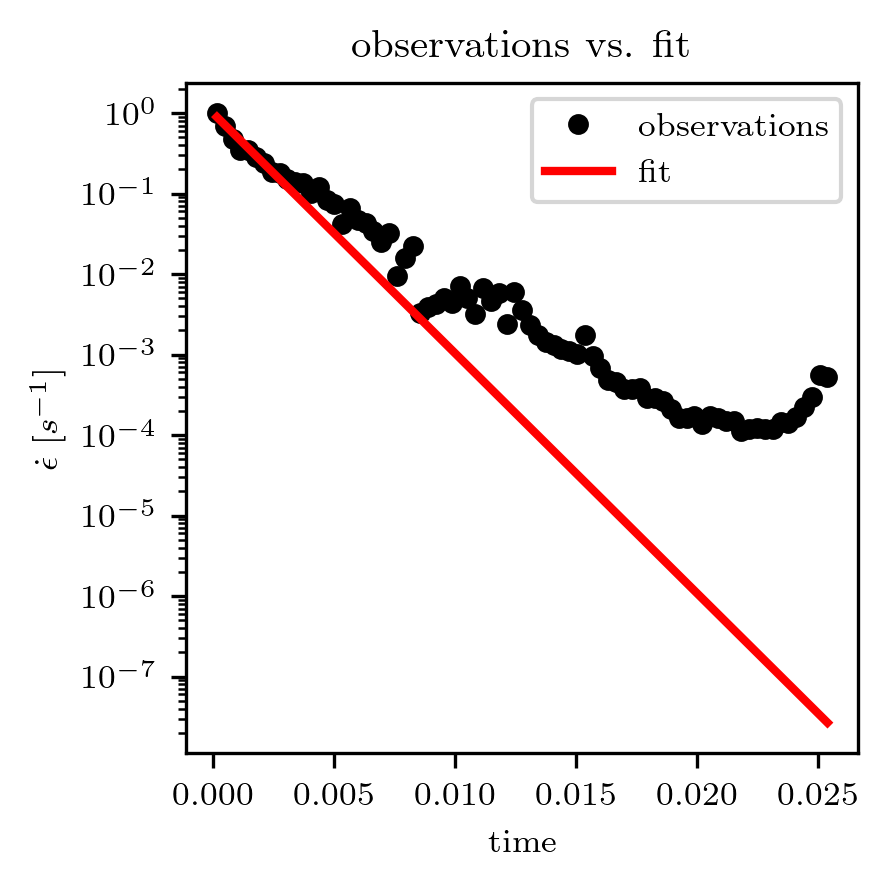

In [38]:
ms = 4
lw = 2

fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot(111)

ax1.plot(xdata, ydata, 'ok', markersize=ms, label='observations')
ax1.plot(xdata, y_fit, 'r', linewidth=lw, label='fit')

# ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel('time')
ax1.set_ylabel(r'$\dot{\epsilon}$ [$s^{-1}$]')
ax1.set_title('observations vs. fit')
ax1.legend()

plt.tight_layout()

## Fitting to each profile

In [39]:
def func(z, l):
    return np.exp(-z / l)


def fit_profile(profile, z):

    profile = np.asarray(profile)
    tws = profile.shape[0]

    fits = [[] for _ in range(tws)]
    popt = [[] for _ in range(tws)]
    pcov = [[] for _ in range(tws)]

    xdata = z

    for tw in range(tws):
        ydata = profile[tw]
        ydata = ydata / np.max(ydata)
        popt[tw], pcov[tw] = curve_fit(func, xdata, ydata)
        fits[tw] = func(xdata, *popt[tw])

    return popt, pcov, fits

In [40]:
FlatRough_02_14_2022_A_I_popt, FlatRough_02_14_2022_A_I_cov, FlatRough_02_14_2022_A_I_fits = fit_profile(
    FlatRough_02_14_2022_A_I_profiles, FlatRough_02_14_2022_A_z)

In [41]:
FlatRough_02_14_2022_B_I_popt, FlatRough_02_14_2022_B_I_cov, FlatRough_02_14_2022_B_I_fits = fit_profile(
    FlatRough_02_14_2022_B_I_profiles, FlatRough_02_14_2022_B_z)

In [42]:
FlatRough_02_14_2022_C_I_popt, FlatRough_02_14_2022_C_I_cov, FlatRough_02_14_2022_C_I_fits = fit_profile(
    FlatRough_02_14_2022_C_I_profiles, FlatRough_02_14_2022_C_z)

In [43]:
FlatRough_02_14_2022_D_I_popt, FlatRough_02_14_2022_D_I_cov, FlatRough_02_14_2022_D_I_fits = fit_profile(
    FlatRough_02_14_2022_D_I_profiles, FlatRough_02_14_2022_D_z)

In [44]:
FlatRough_02_14_2022_E_I_popt, FlatRough_02_14_2022_E_I_cov, FlatRough_02_14_2022_E_I_fits = fit_profile(
    FlatRough_02_14_2022_E_I_profiles, FlatRough_02_14_2022_E_z)

In [45]:
FlatRough_02_14_2022_F_I_popt, FlatRough_02_14_2022_F_I_cov, FlatRough_02_14_2022_F_I_fits = fit_profile(
    FlatRough_02_14_2022_F_I_profiles, FlatRough_02_14_2022_F_z)

In [46]:
FlatRough_02_14_2022_G_I_popt, FlatRough_02_14_2022_G_I_cov, FlatRough_02_14_2022_G_I_fits = fit_profile(
    FlatRough_02_14_2022_G_I_profiles, FlatRough_02_14_2022_G_z)

In [47]:
FlatRough_02_14_2022_H_I_popt, FlatRough_02_14_2022_J_I_cov, FlatRough_02_14_2022_H_I_fits = fit_profile(
    FlatRough_02_14_2022_H_I_profiles, FlatRough_02_14_2022_H_z)

/tmp/ipykernel_56288/3435466972.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-z / l)


In [48]:
FlatRough_02_14_2022_I_I_popt, FlatRough_02_14_2022_I_I_cov, FlatRough_02_14_2022_I_I_fits = fit_profile(
    FlatRough_02_14_2022_I_I_profiles, FlatRough_02_14_2022_I_z)

/home/nakul/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [49]:
FlatRough_02_14_2022_J_I_popt, FlatRough_02_14_2022_J_I_cov, FlatRough_02_14_2022_J_I_fits = fit_profile(
    FlatRough_02_14_2022_J_I_profiles, FlatRough_02_14_2022_J_z)

# Plot all fits and observations for a given experimental realization

In [50]:
def plot_fits(profiles,fits,z):
    
    fig = plt.figure(figsize=(10, 4))

    idx = 1

    for i in range(10):

        ax = fig.add_subplot(2, 5, idx)

        ax.plot(z,
                profiles[i] / np.nanmax(profiles[i]),
                'ok',
                markersize=ms,
                label='observations')

        ax.plot(z, fits[i], 'r', linewidth=lw, label='fit')

        ax.set_yscale('log')
        ax.set_ylim([1e-5,1e1])

        idx += 1

    plt.tight_layout()



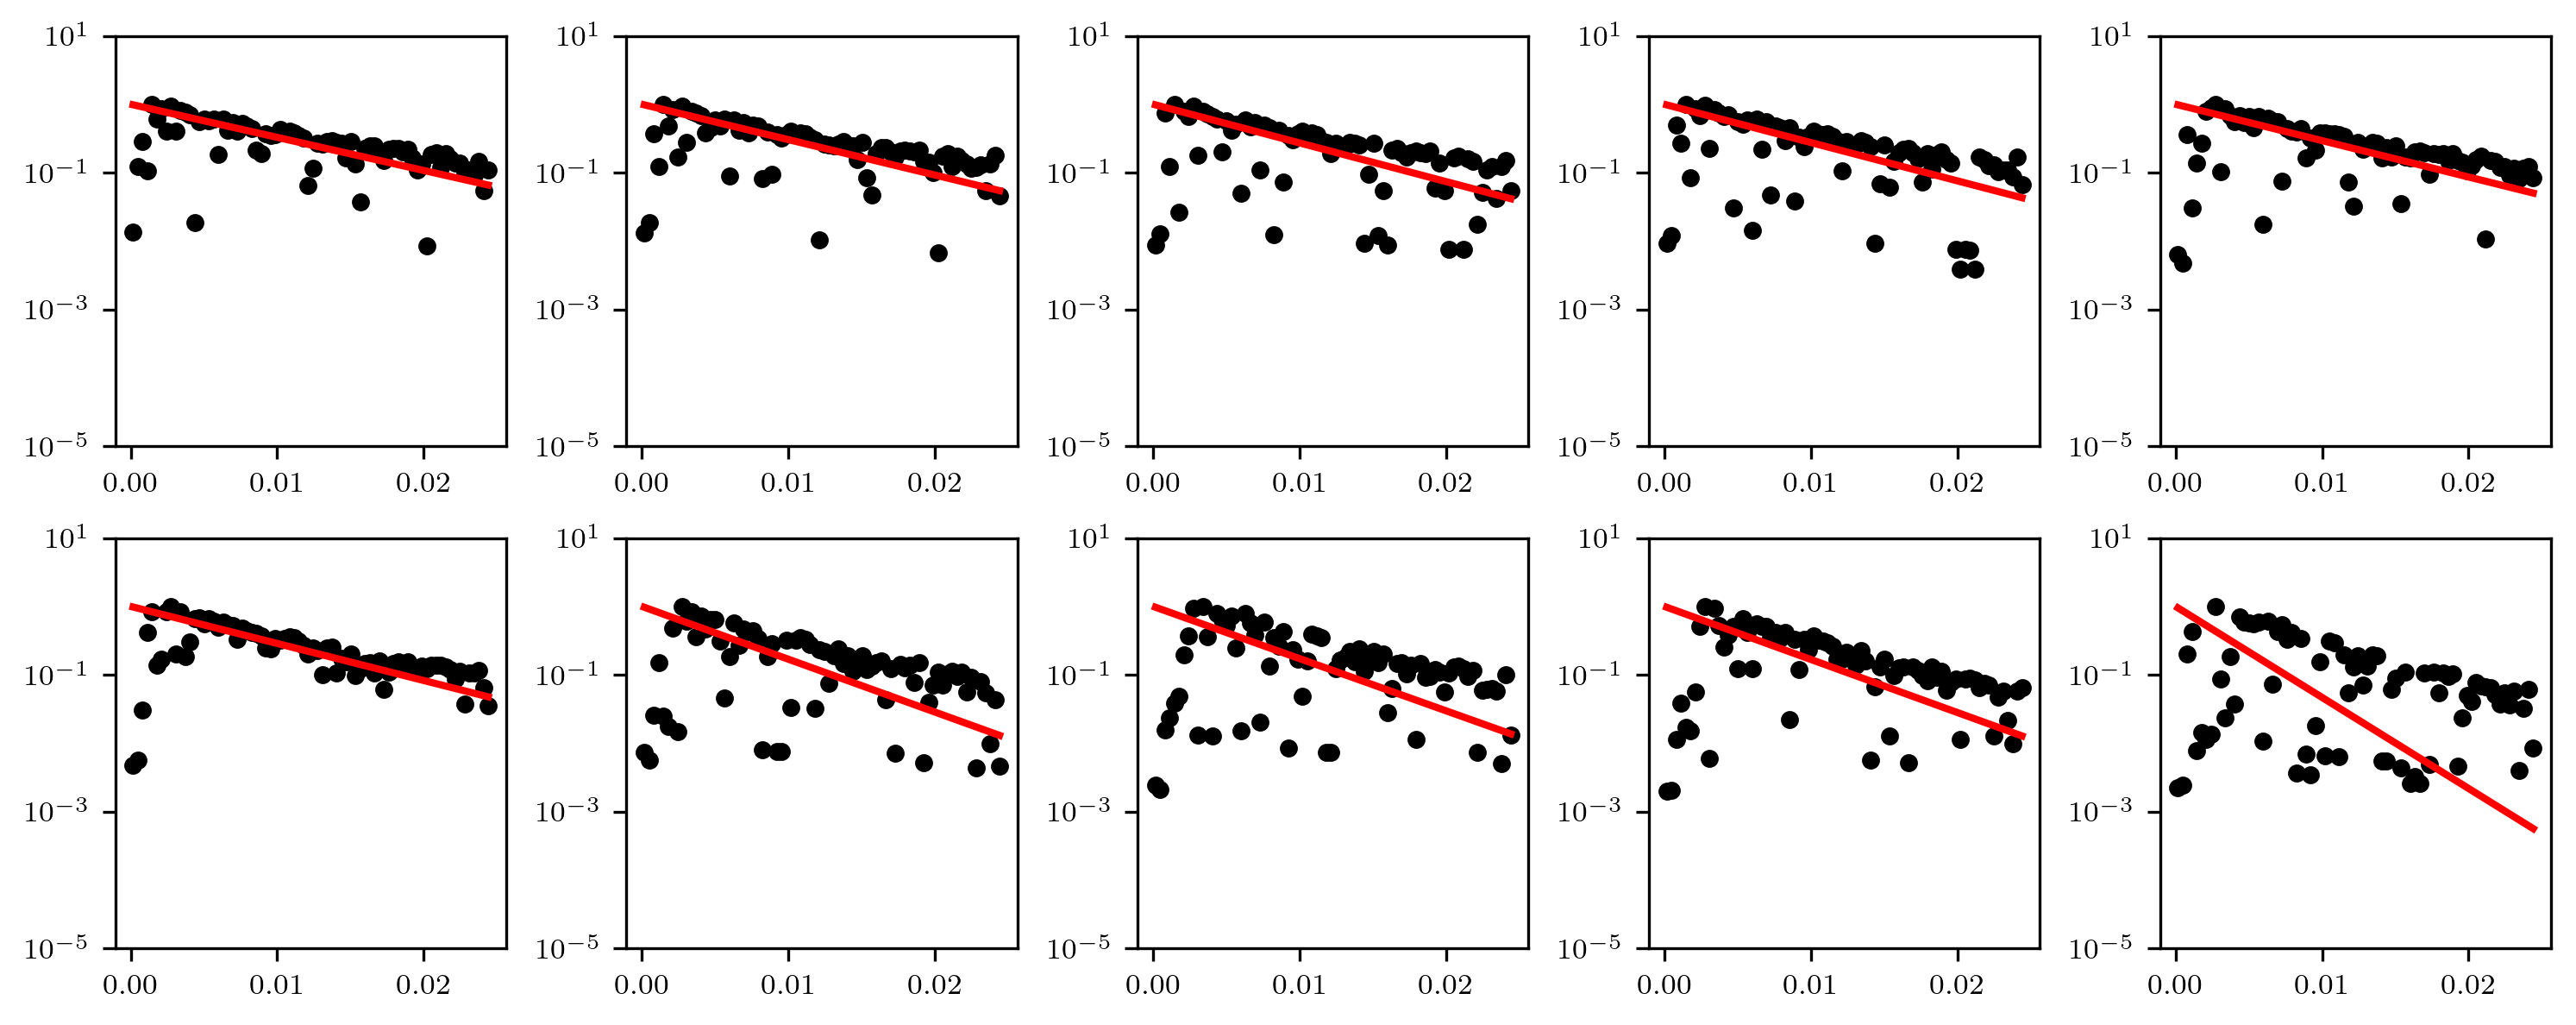

In [51]:
plot_fits(FlatRough_02_14_2022_A_I_profiles,FlatRough_02_14_2022_A_I_fits,FlatRough_02_14_2022_A_z)

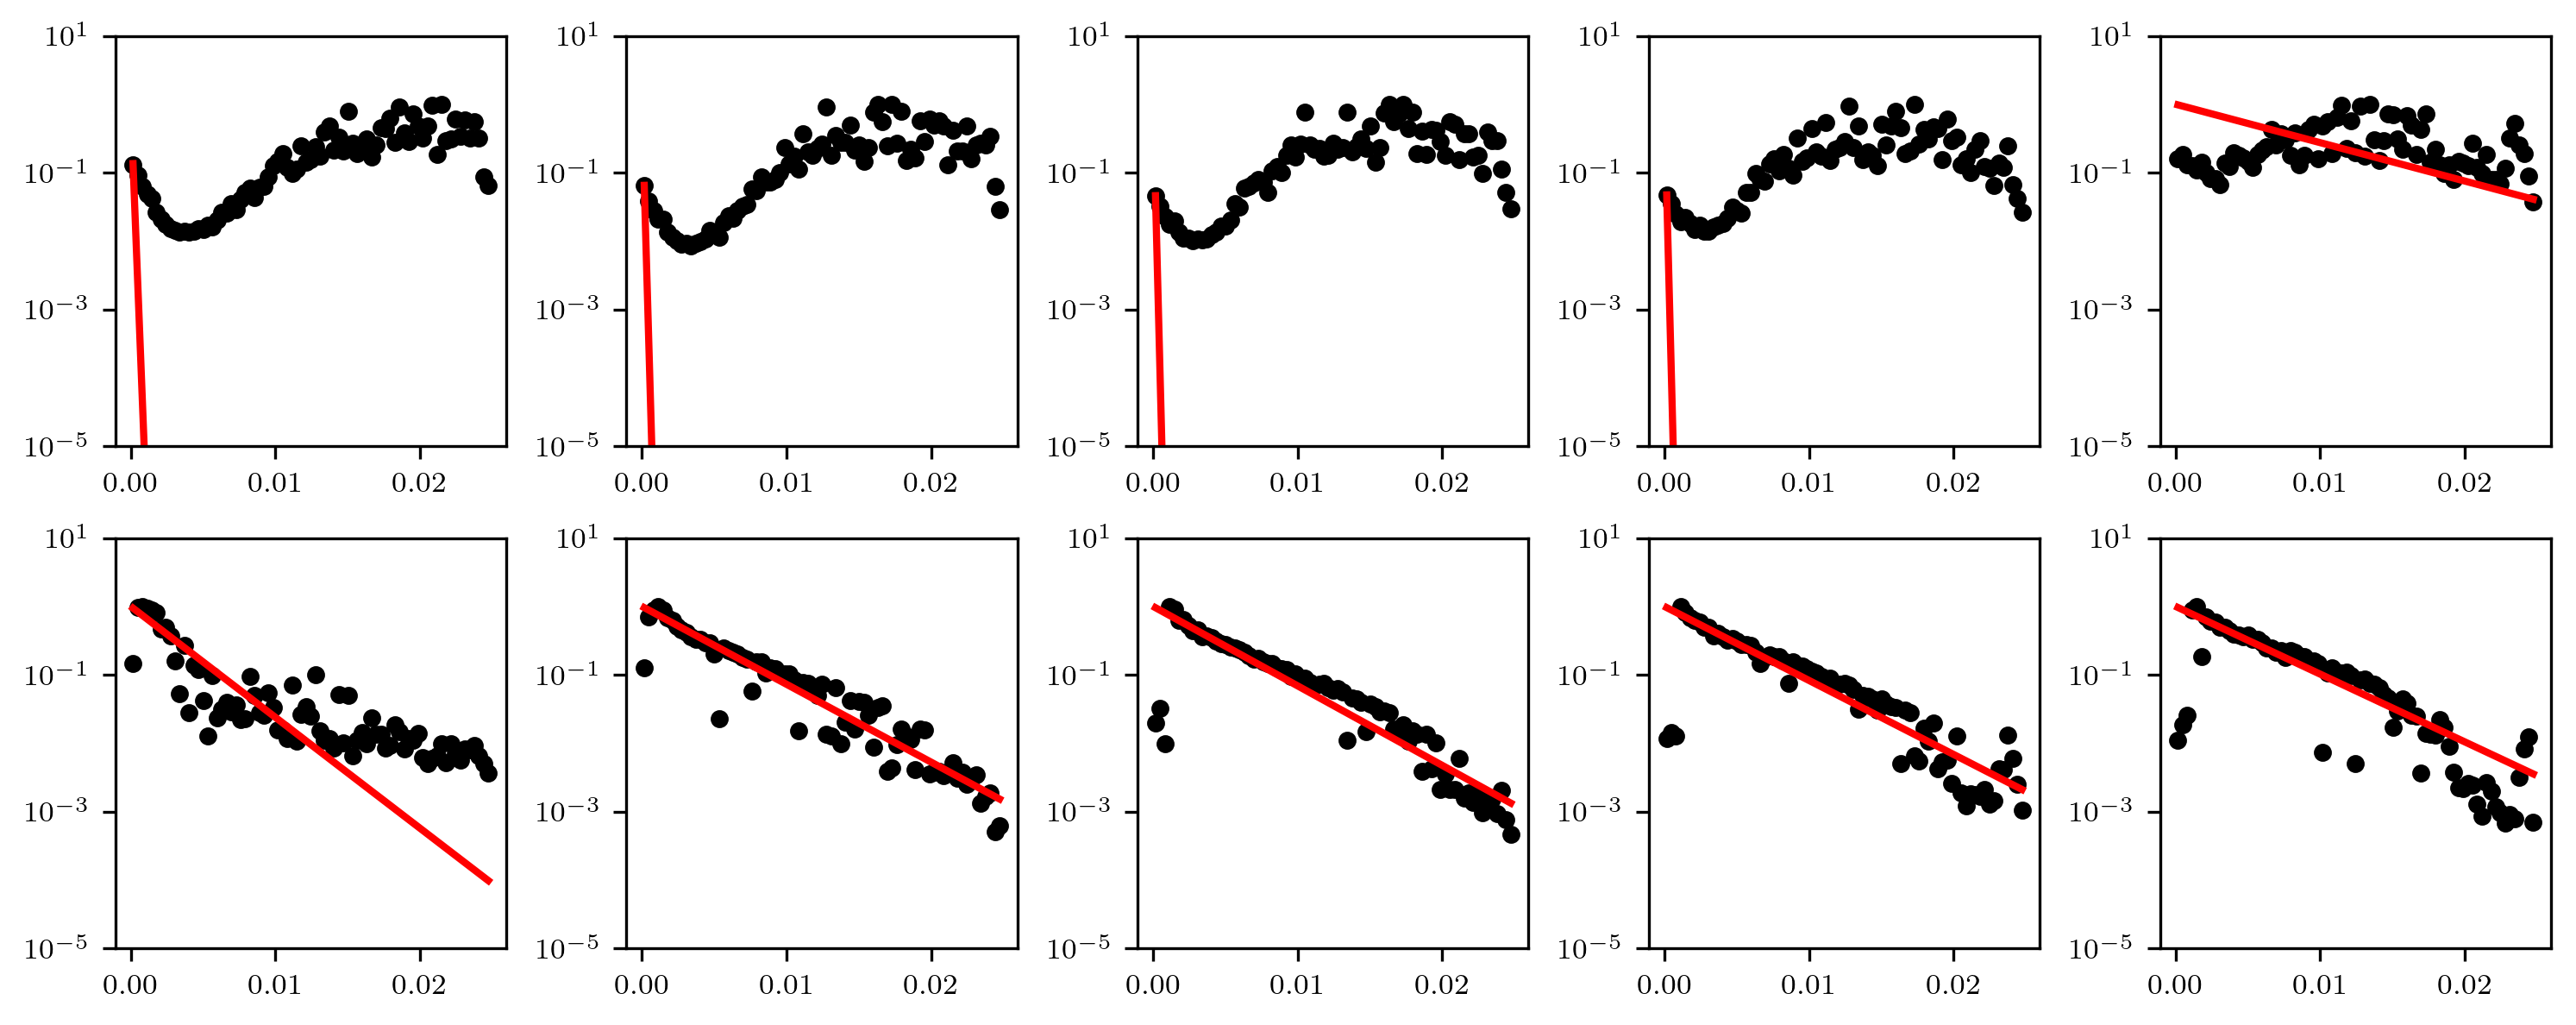

In [52]:
plot_fits(FlatRough_02_14_2022_B_I_profiles,FlatRough_02_14_2022_B_I_fits,FlatRough_02_14_2022_B_z)

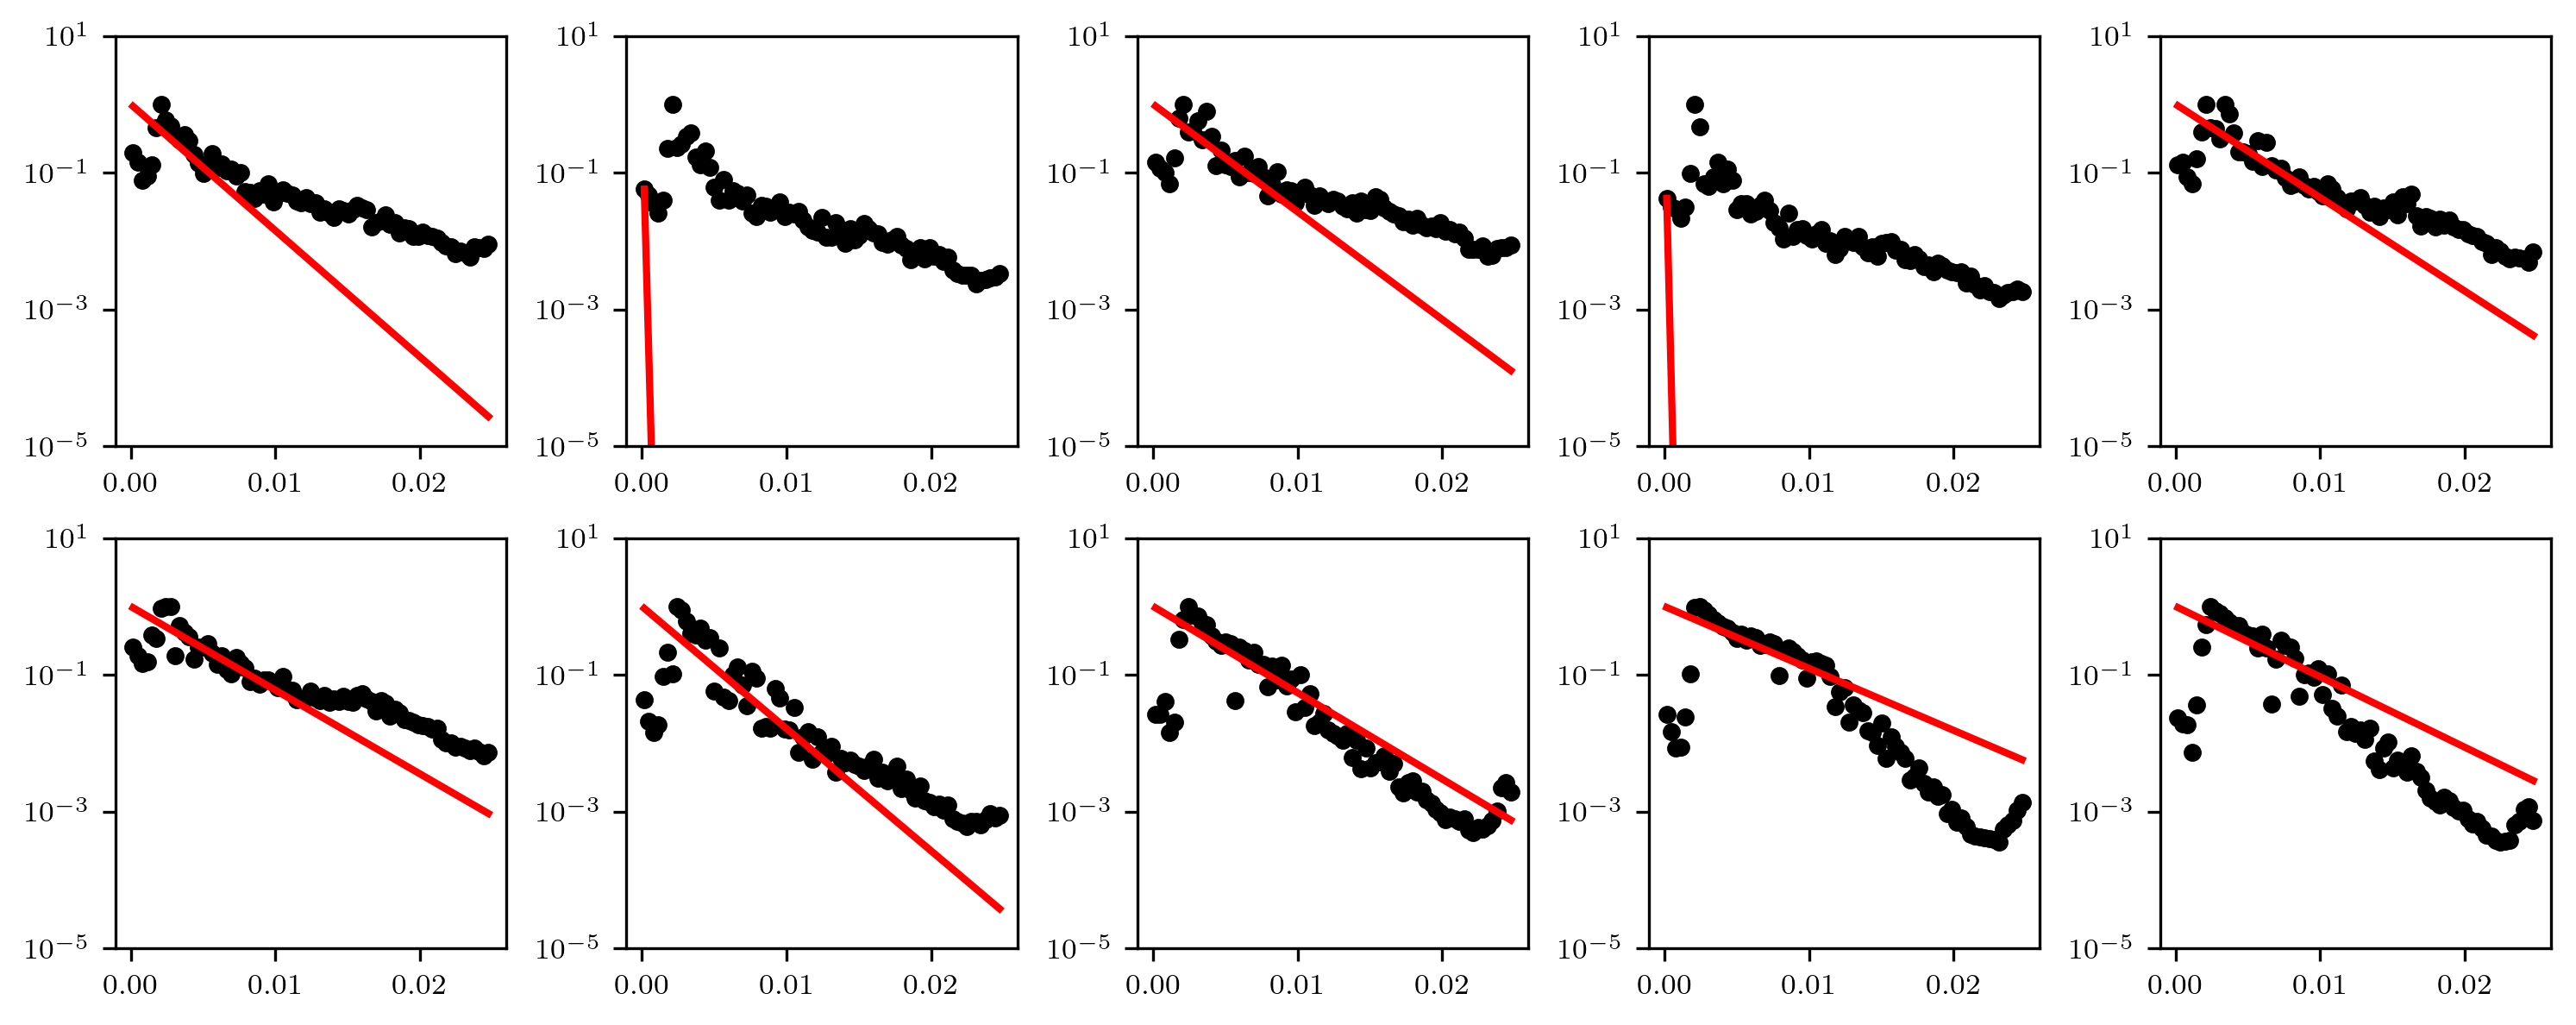

In [53]:
plot_fits(FlatRough_02_14_2022_C_I_profiles,FlatRough_02_14_2022_C_I_fits,FlatRough_02_14_2022_C_z)

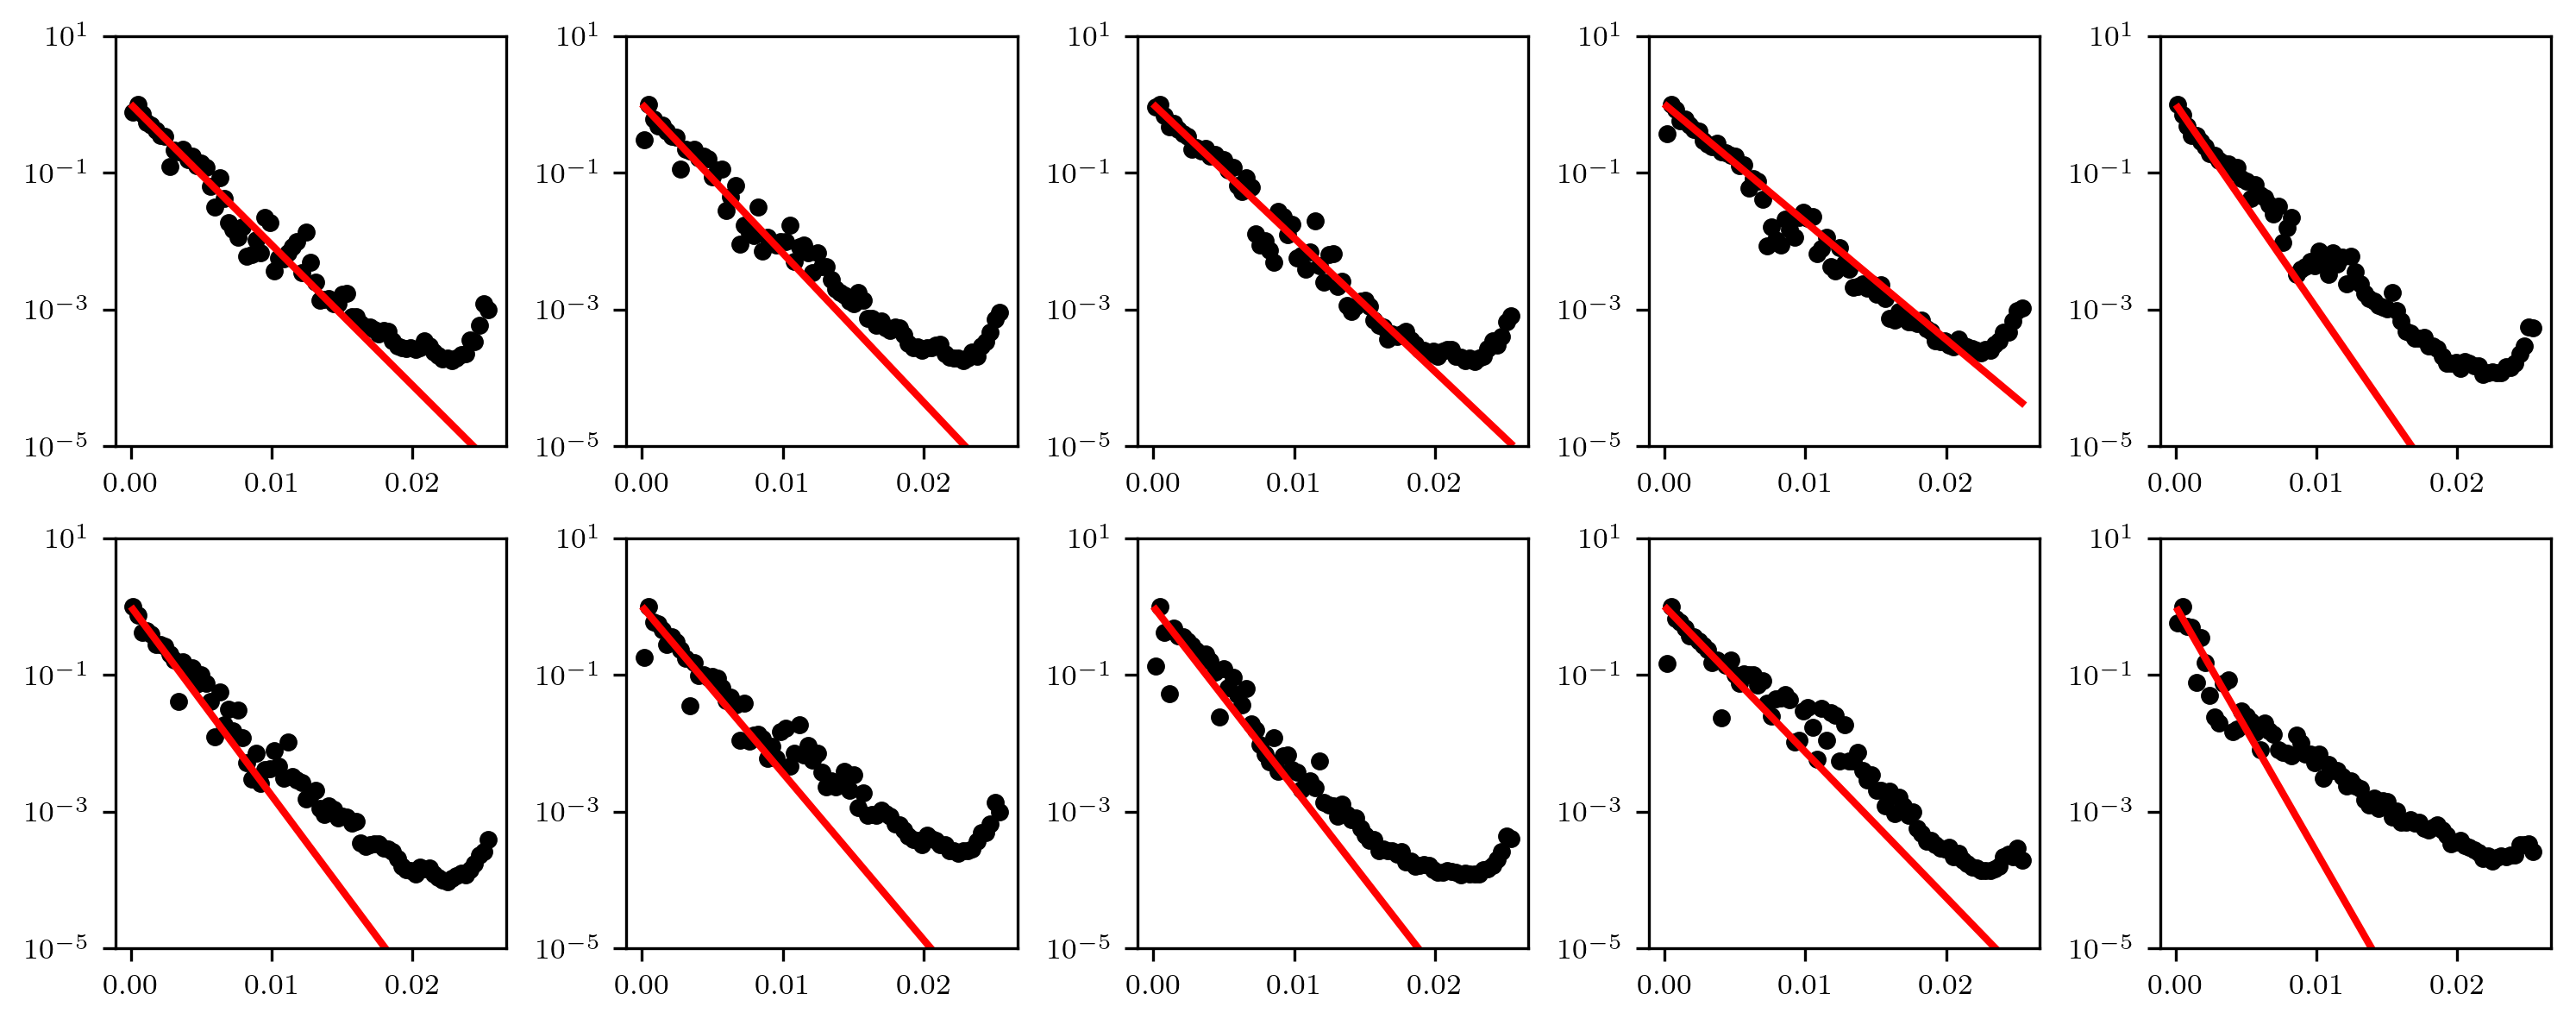

In [54]:
plot_fits(FlatRough_02_14_2022_D_I_profiles,FlatRough_02_14_2022_D_I_fits,FlatRough_02_14_2022_D_z)

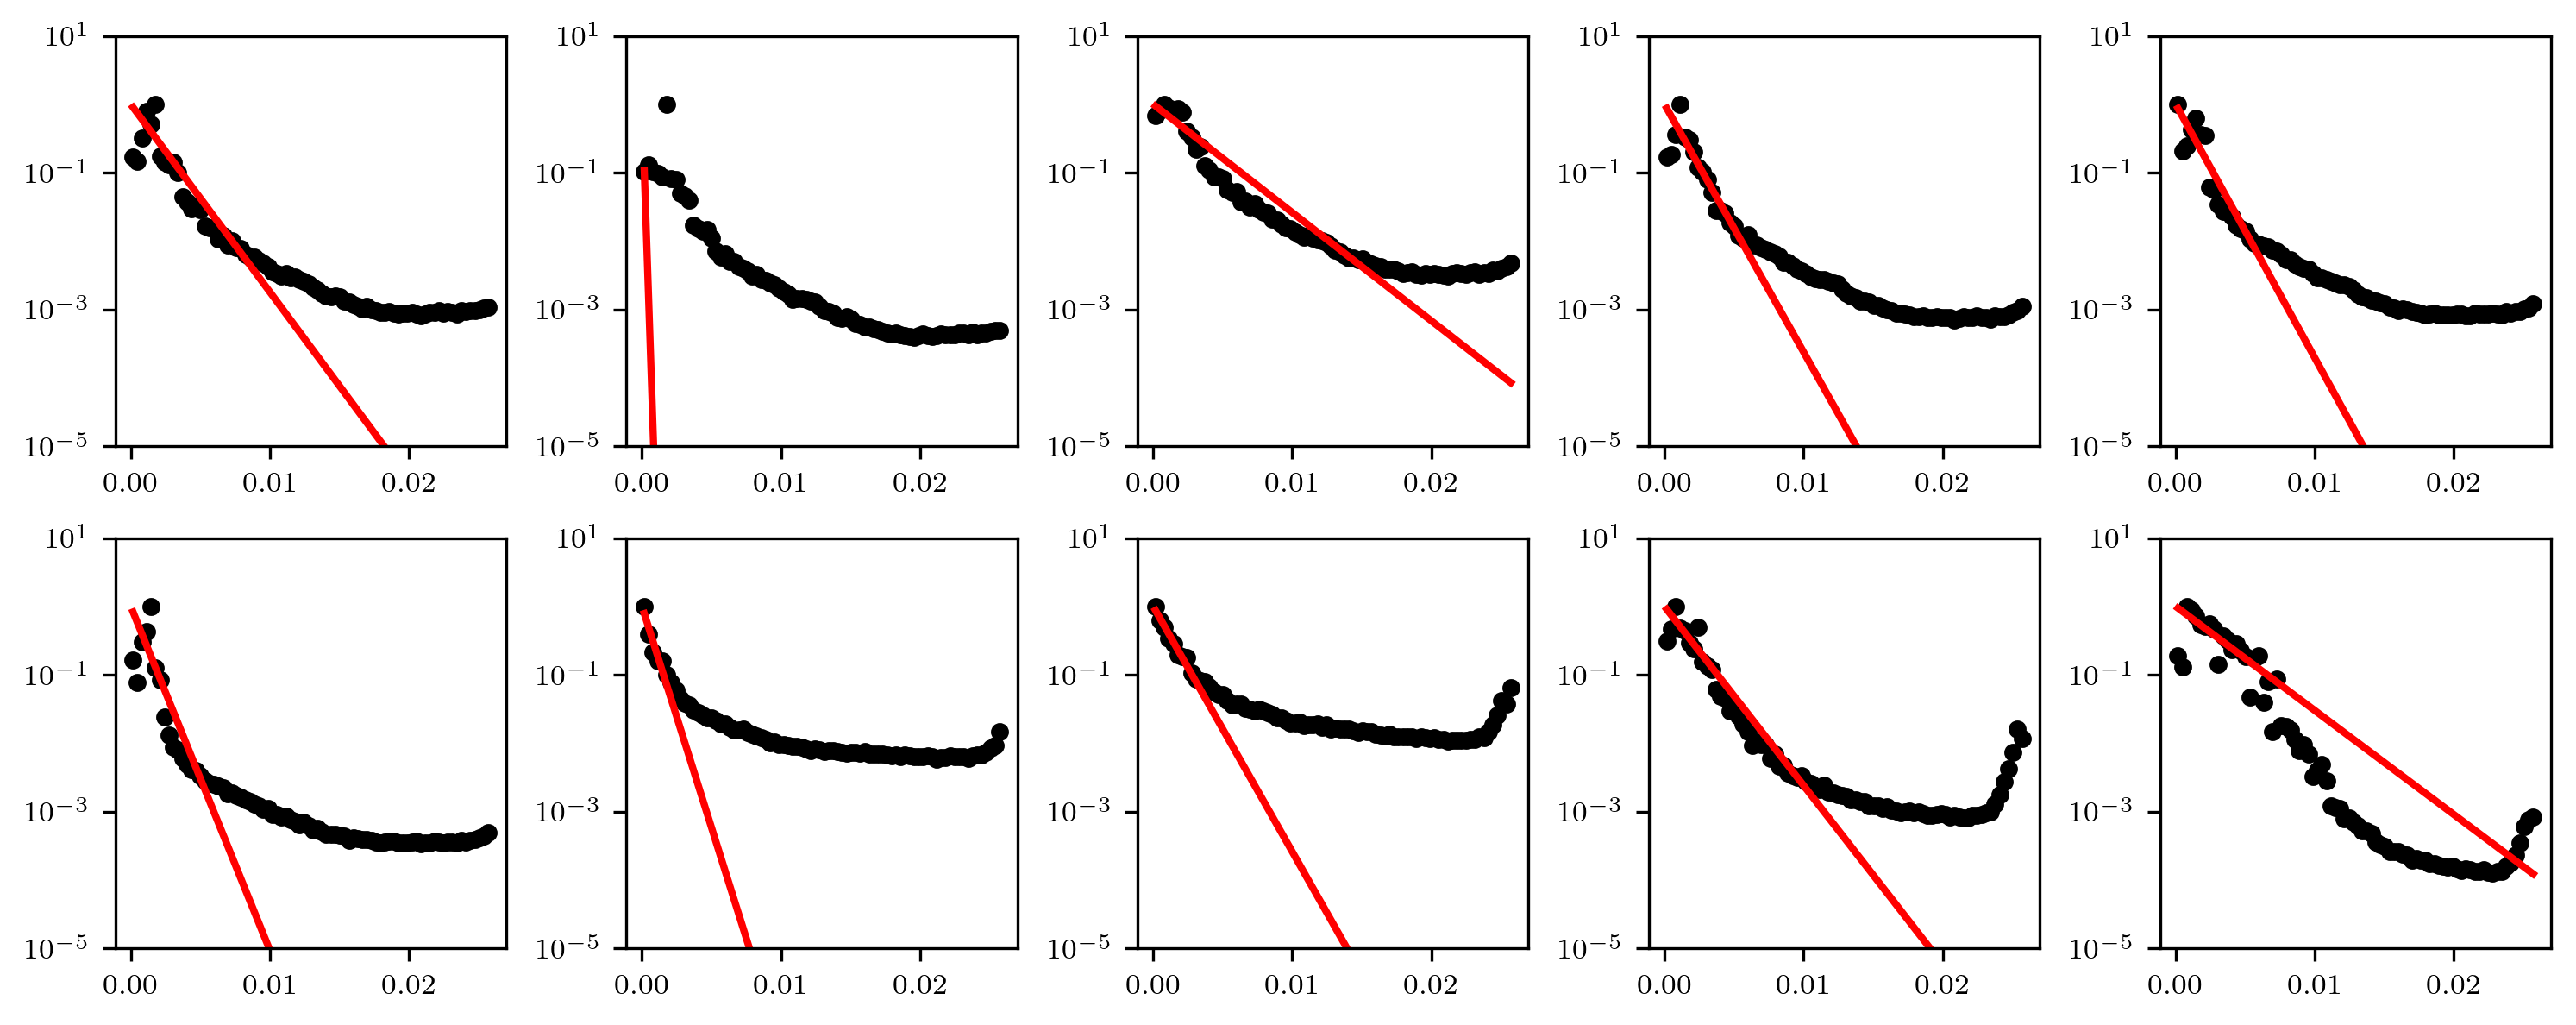

In [55]:
plot_fits(FlatRough_02_14_2022_E_I_profiles,FlatRough_02_14_2022_E_I_fits,FlatRough_02_14_2022_E_z)

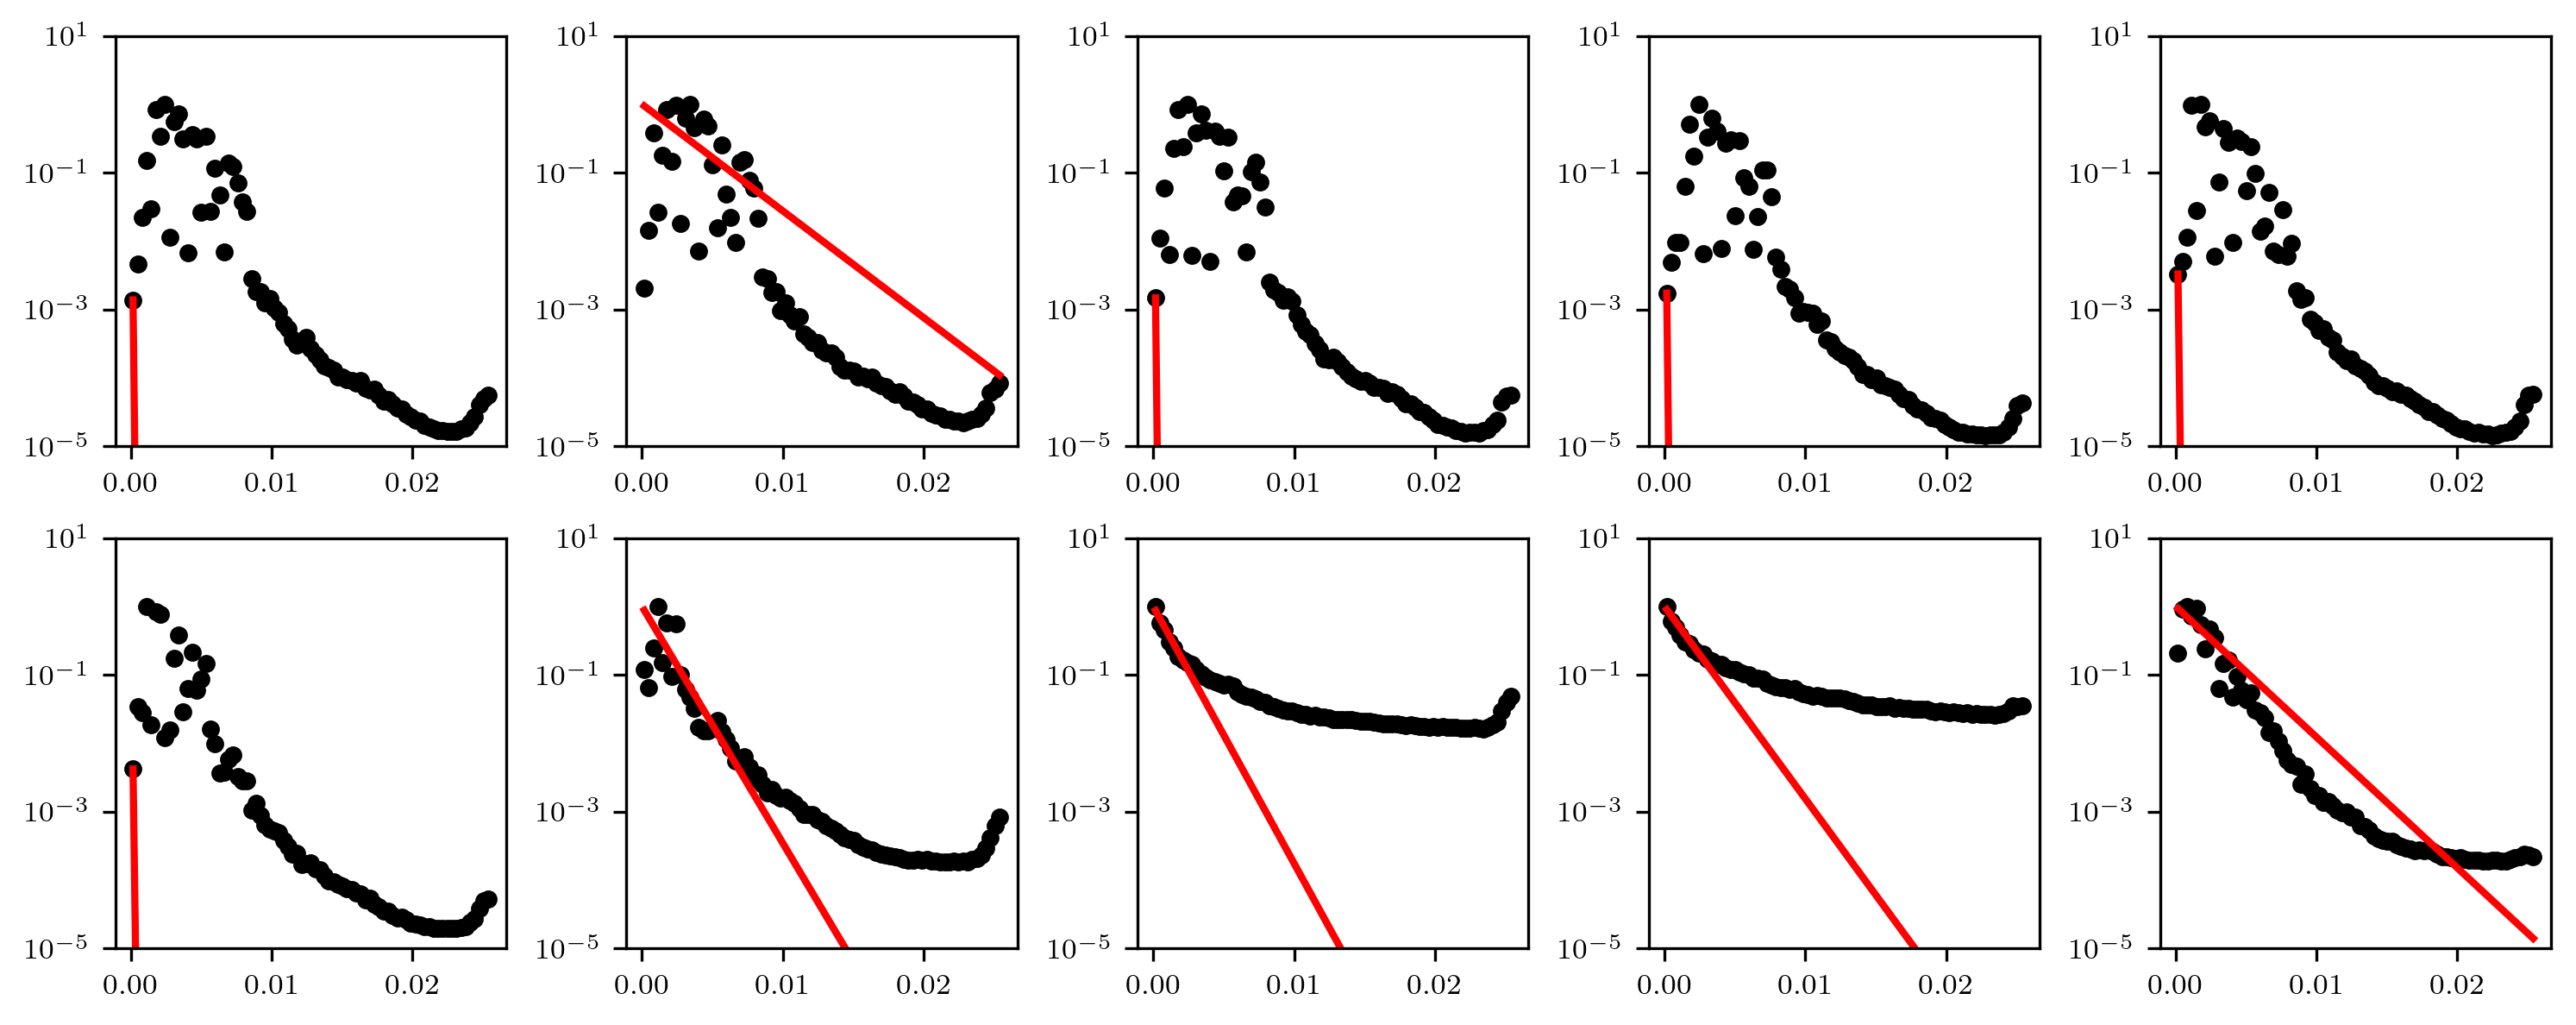

In [56]:
plot_fits(FlatRough_02_14_2022_F_I_profiles,FlatRough_02_14_2022_F_I_fits,FlatRough_02_14_2022_F_z)

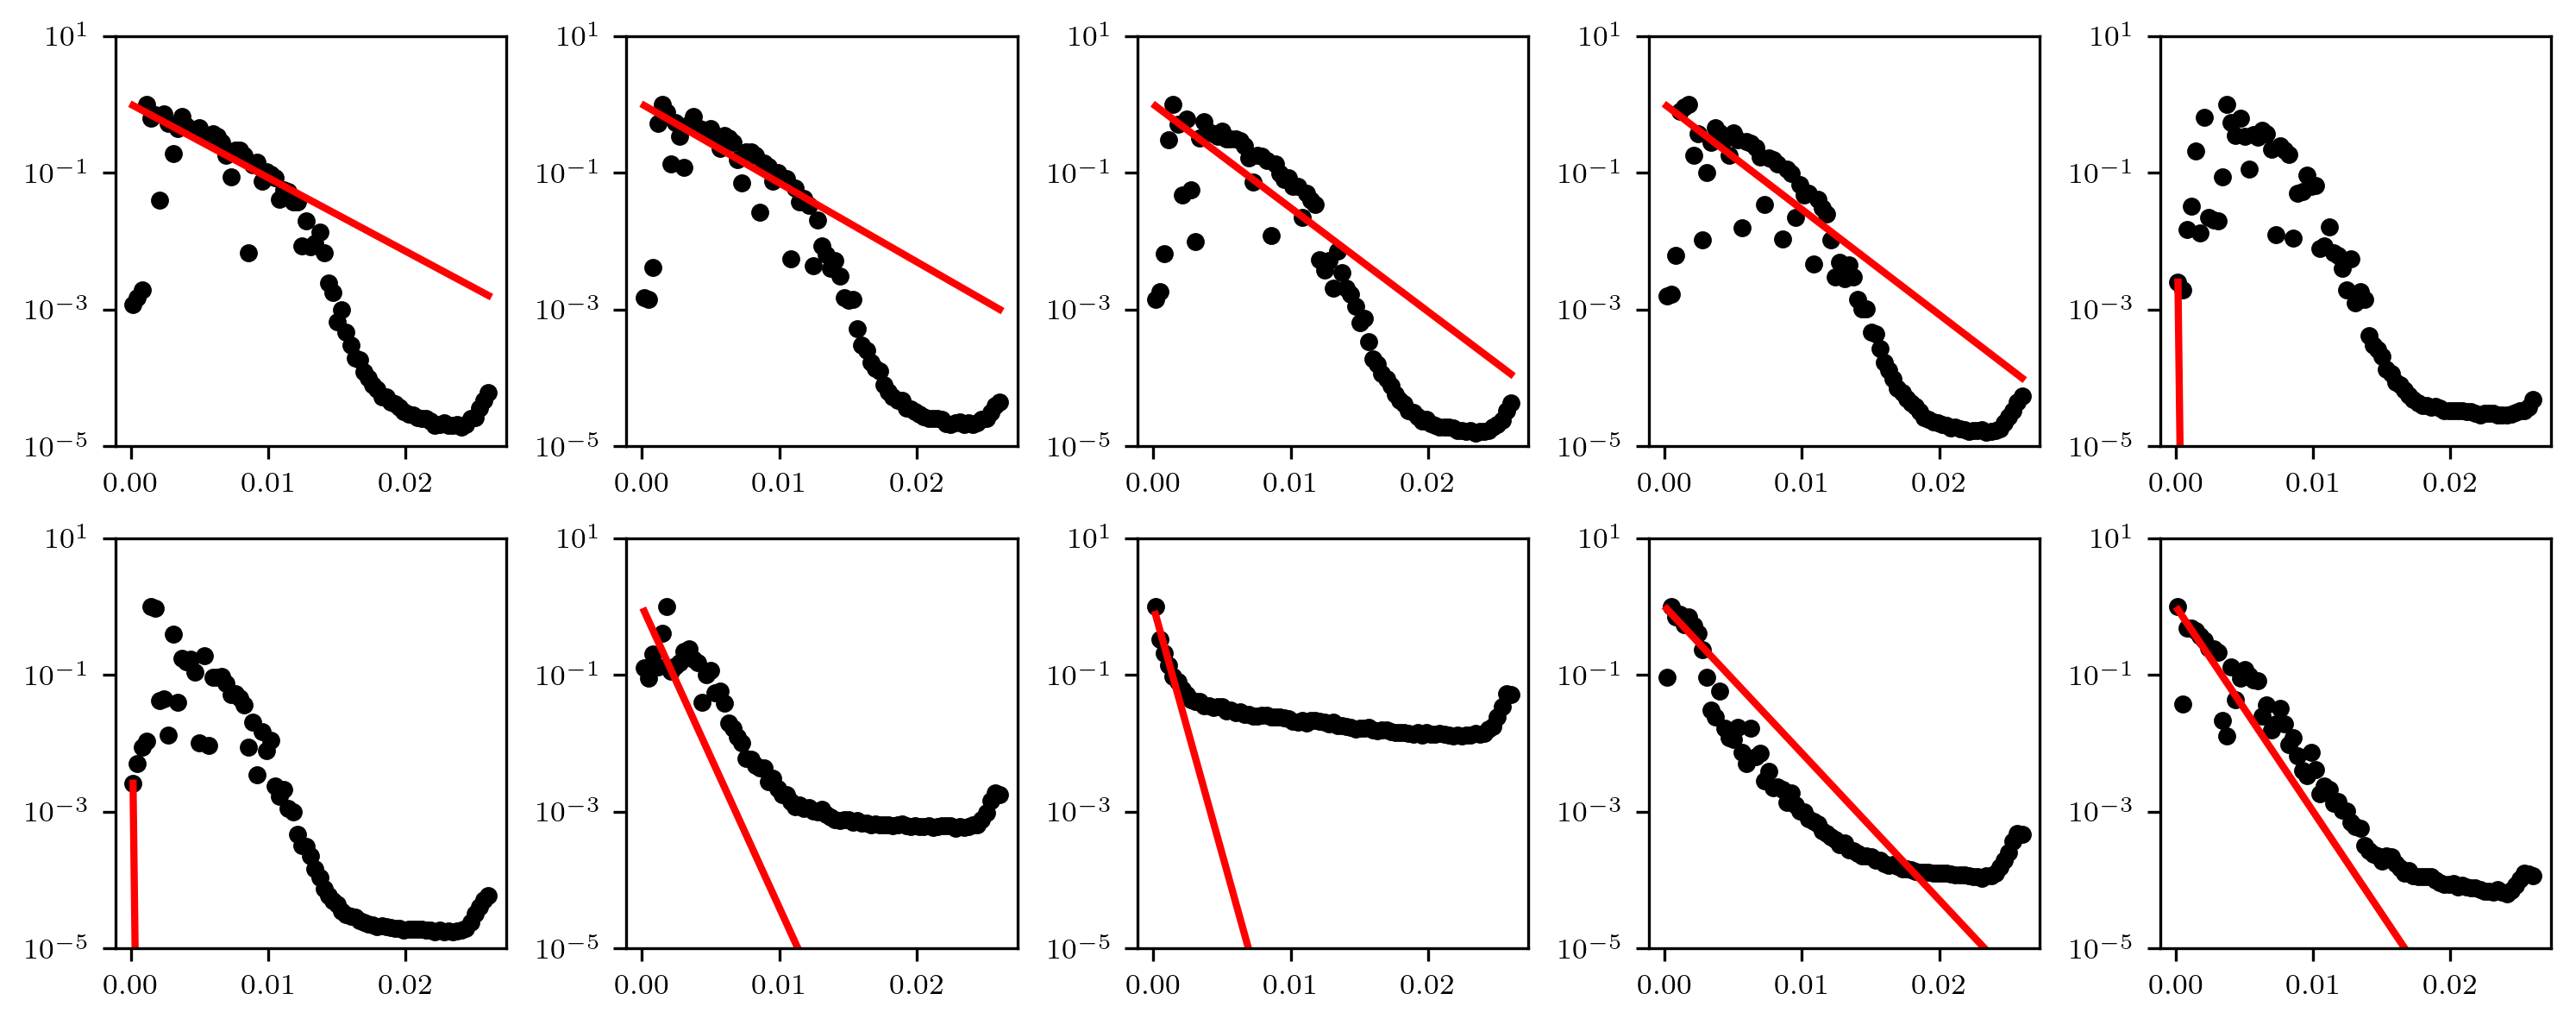

In [57]:
plot_fits(FlatRough_02_14_2022_G_I_profiles,FlatRough_02_14_2022_G_I_fits,FlatRough_02_14_2022_G_z)

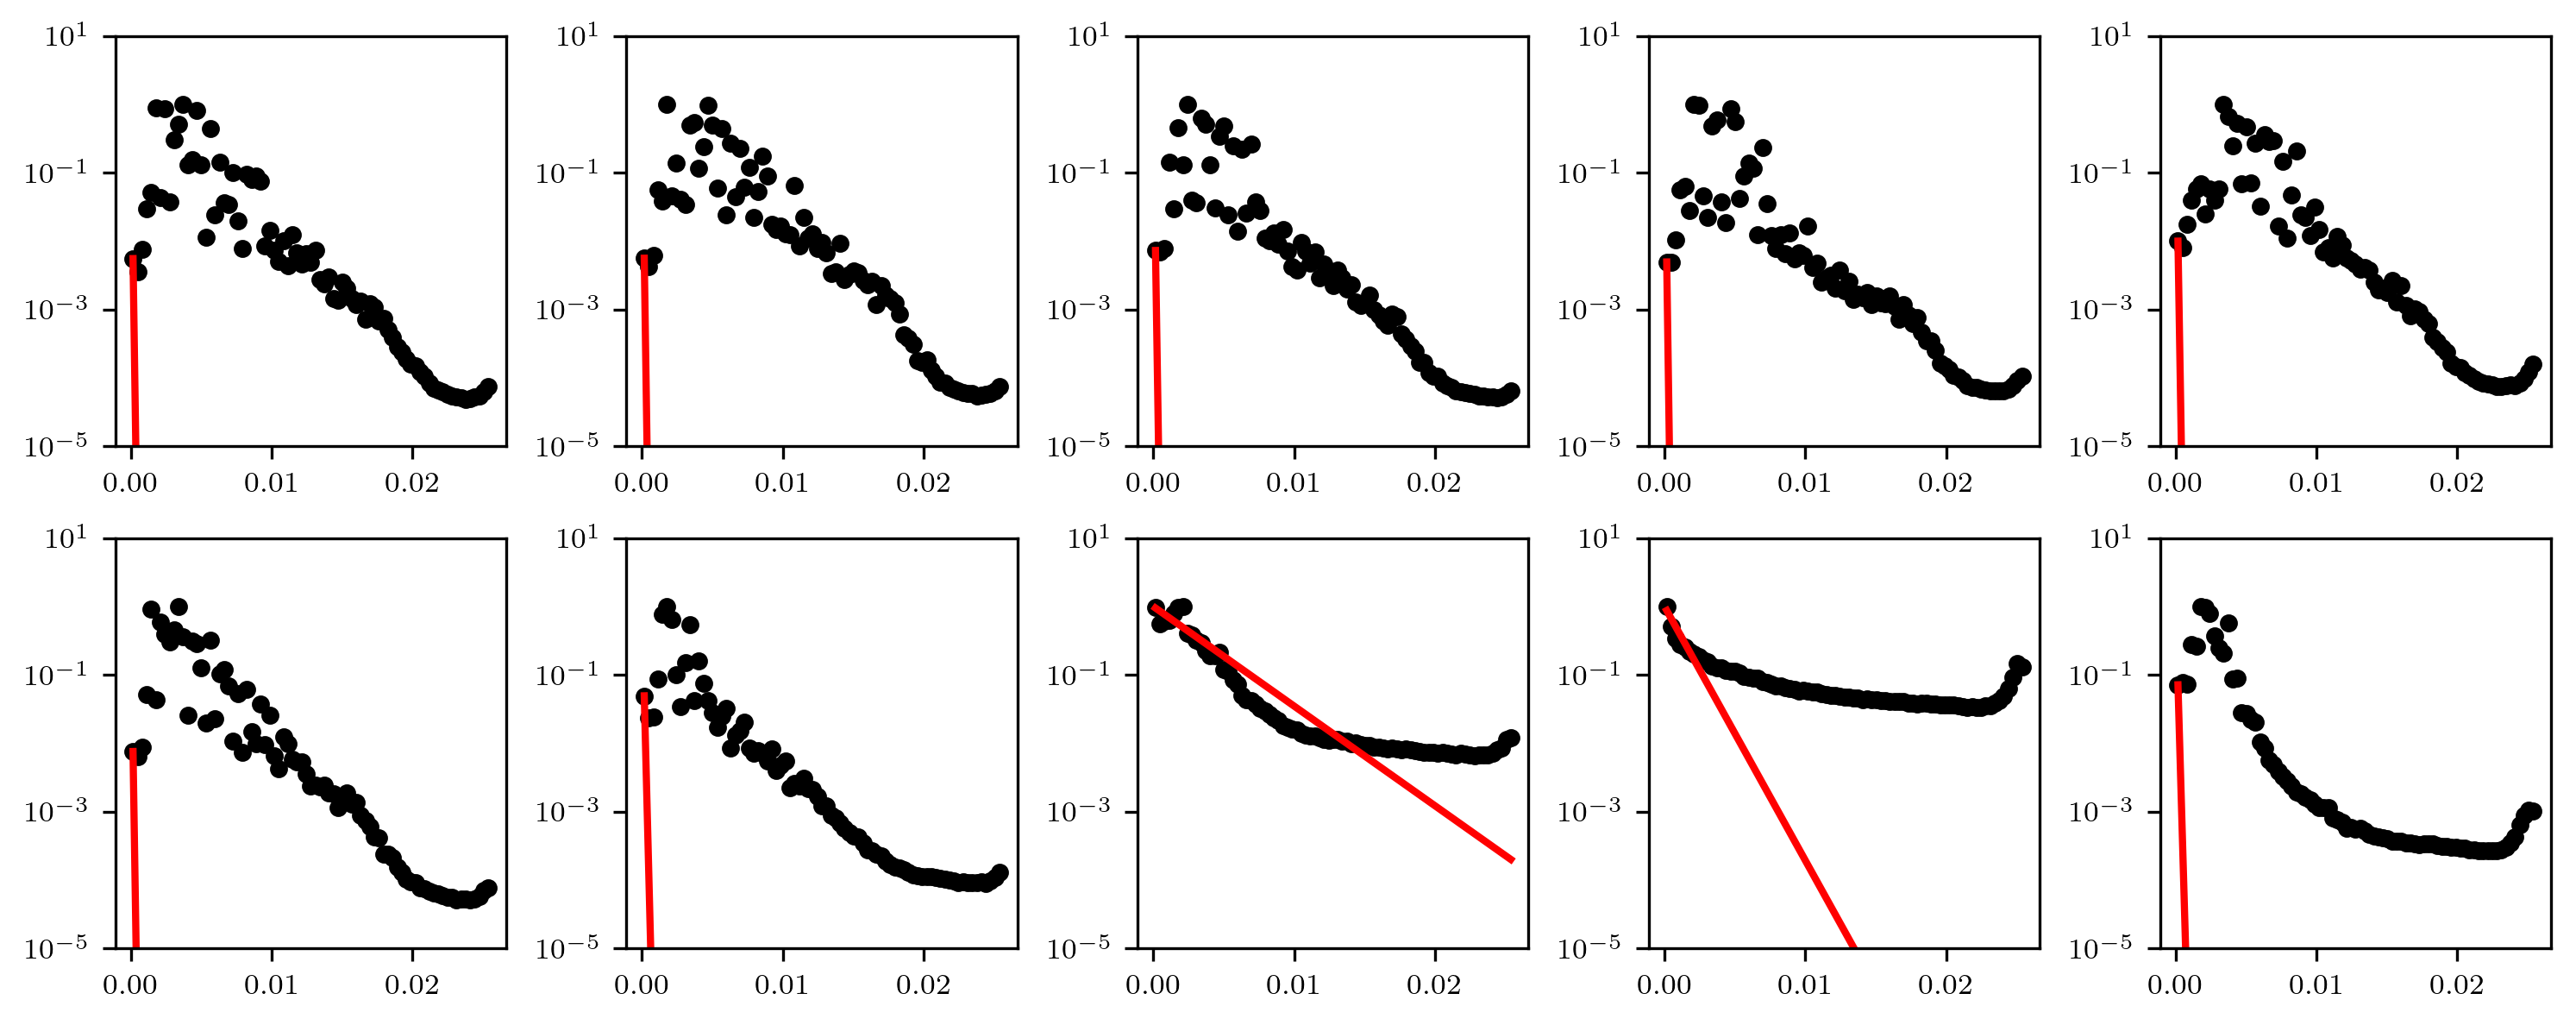

In [58]:
plot_fits(FlatRough_02_14_2022_H_I_profiles,FlatRough_02_14_2022_H_I_fits,FlatRough_02_14_2022_H_z)

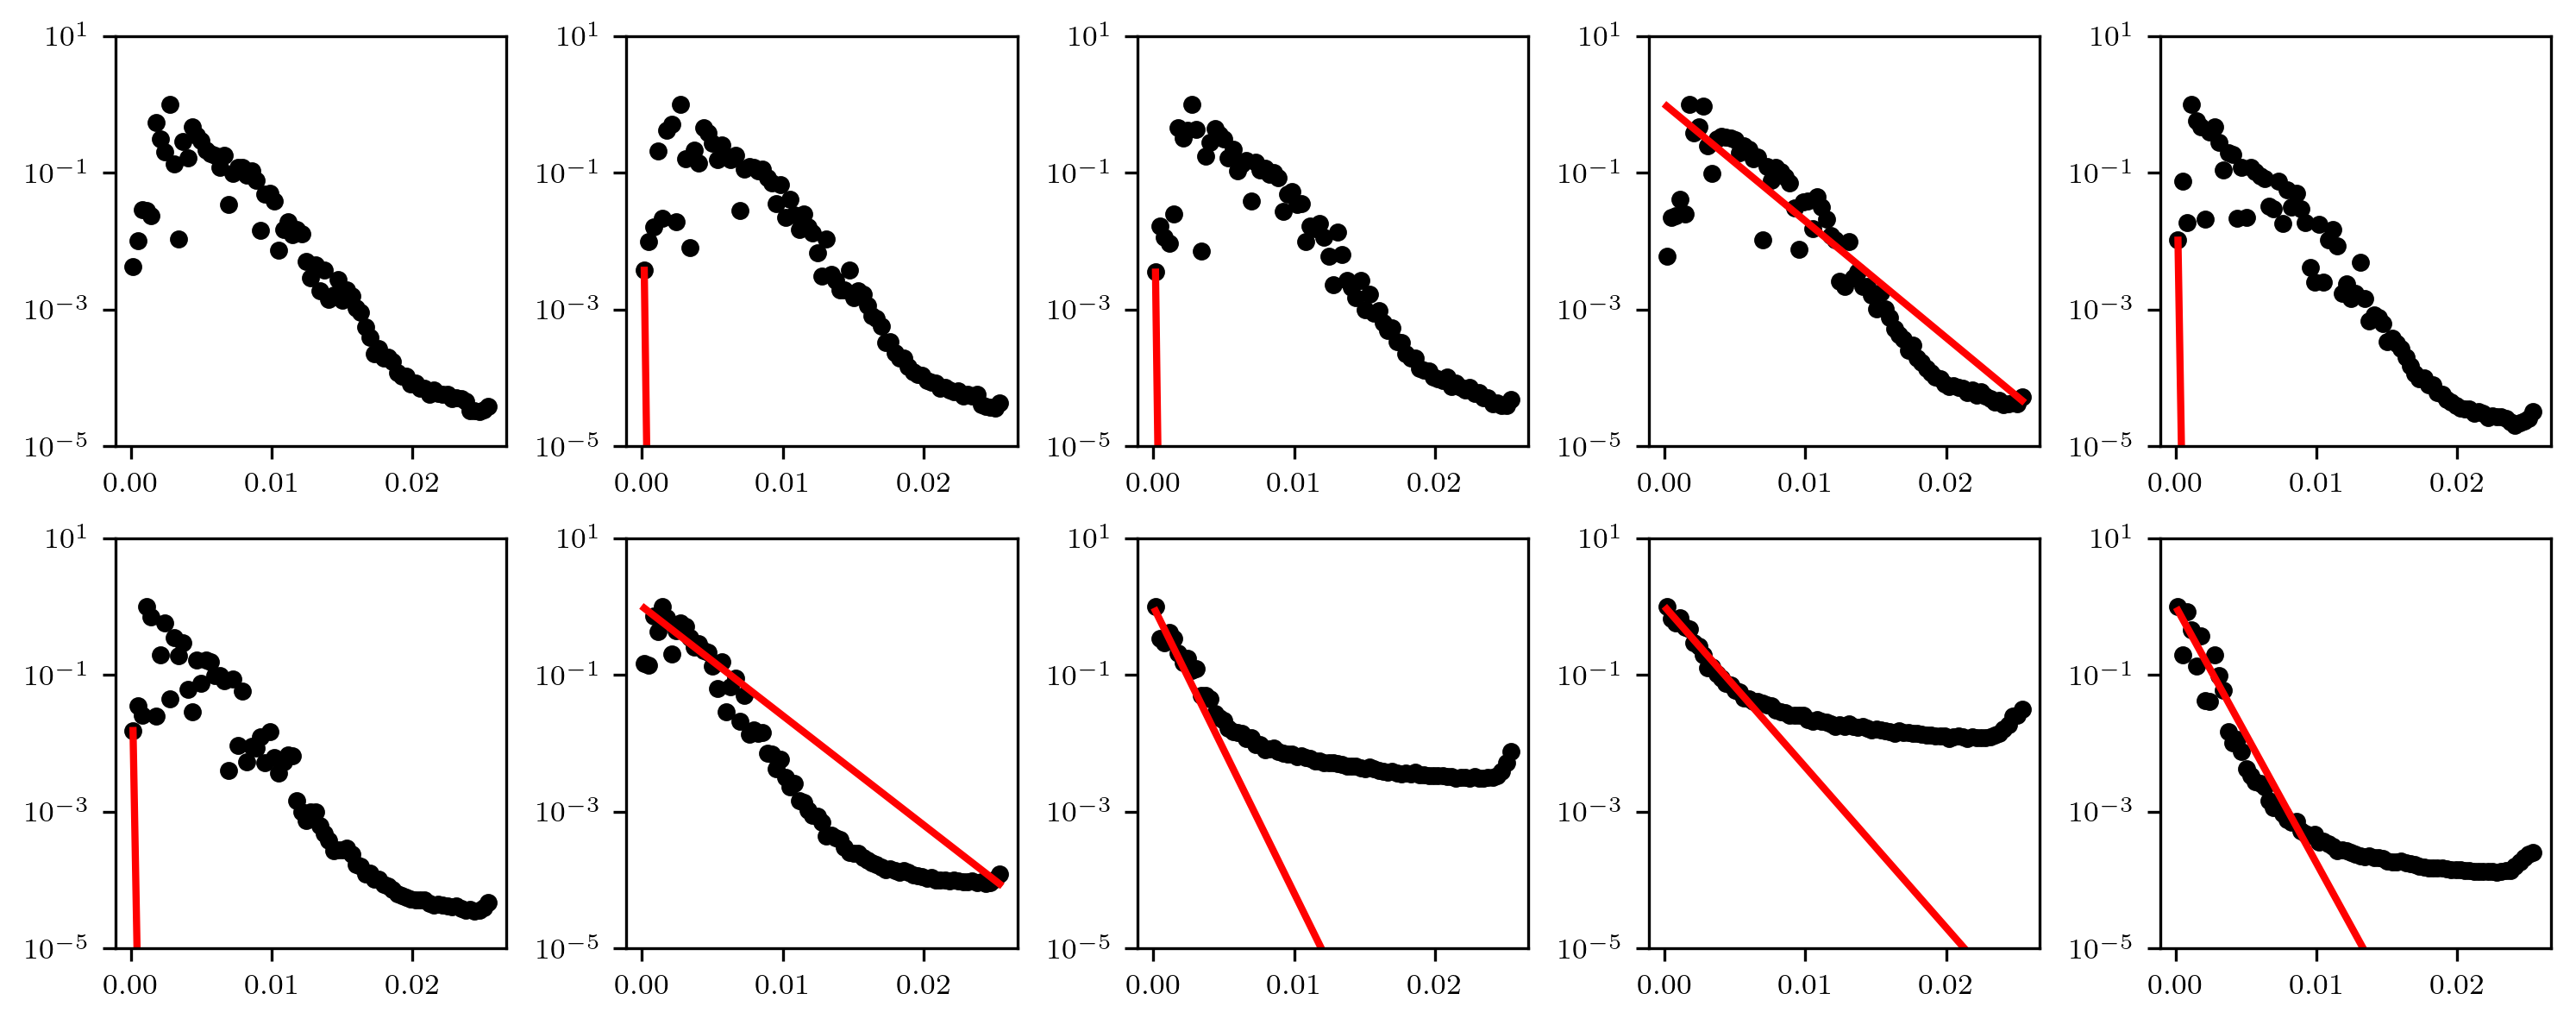

In [59]:
plot_fits(FlatRough_02_14_2022_I_I_profiles,FlatRough_02_14_2022_I_I_fits,FlatRough_02_14_2022_I_z)

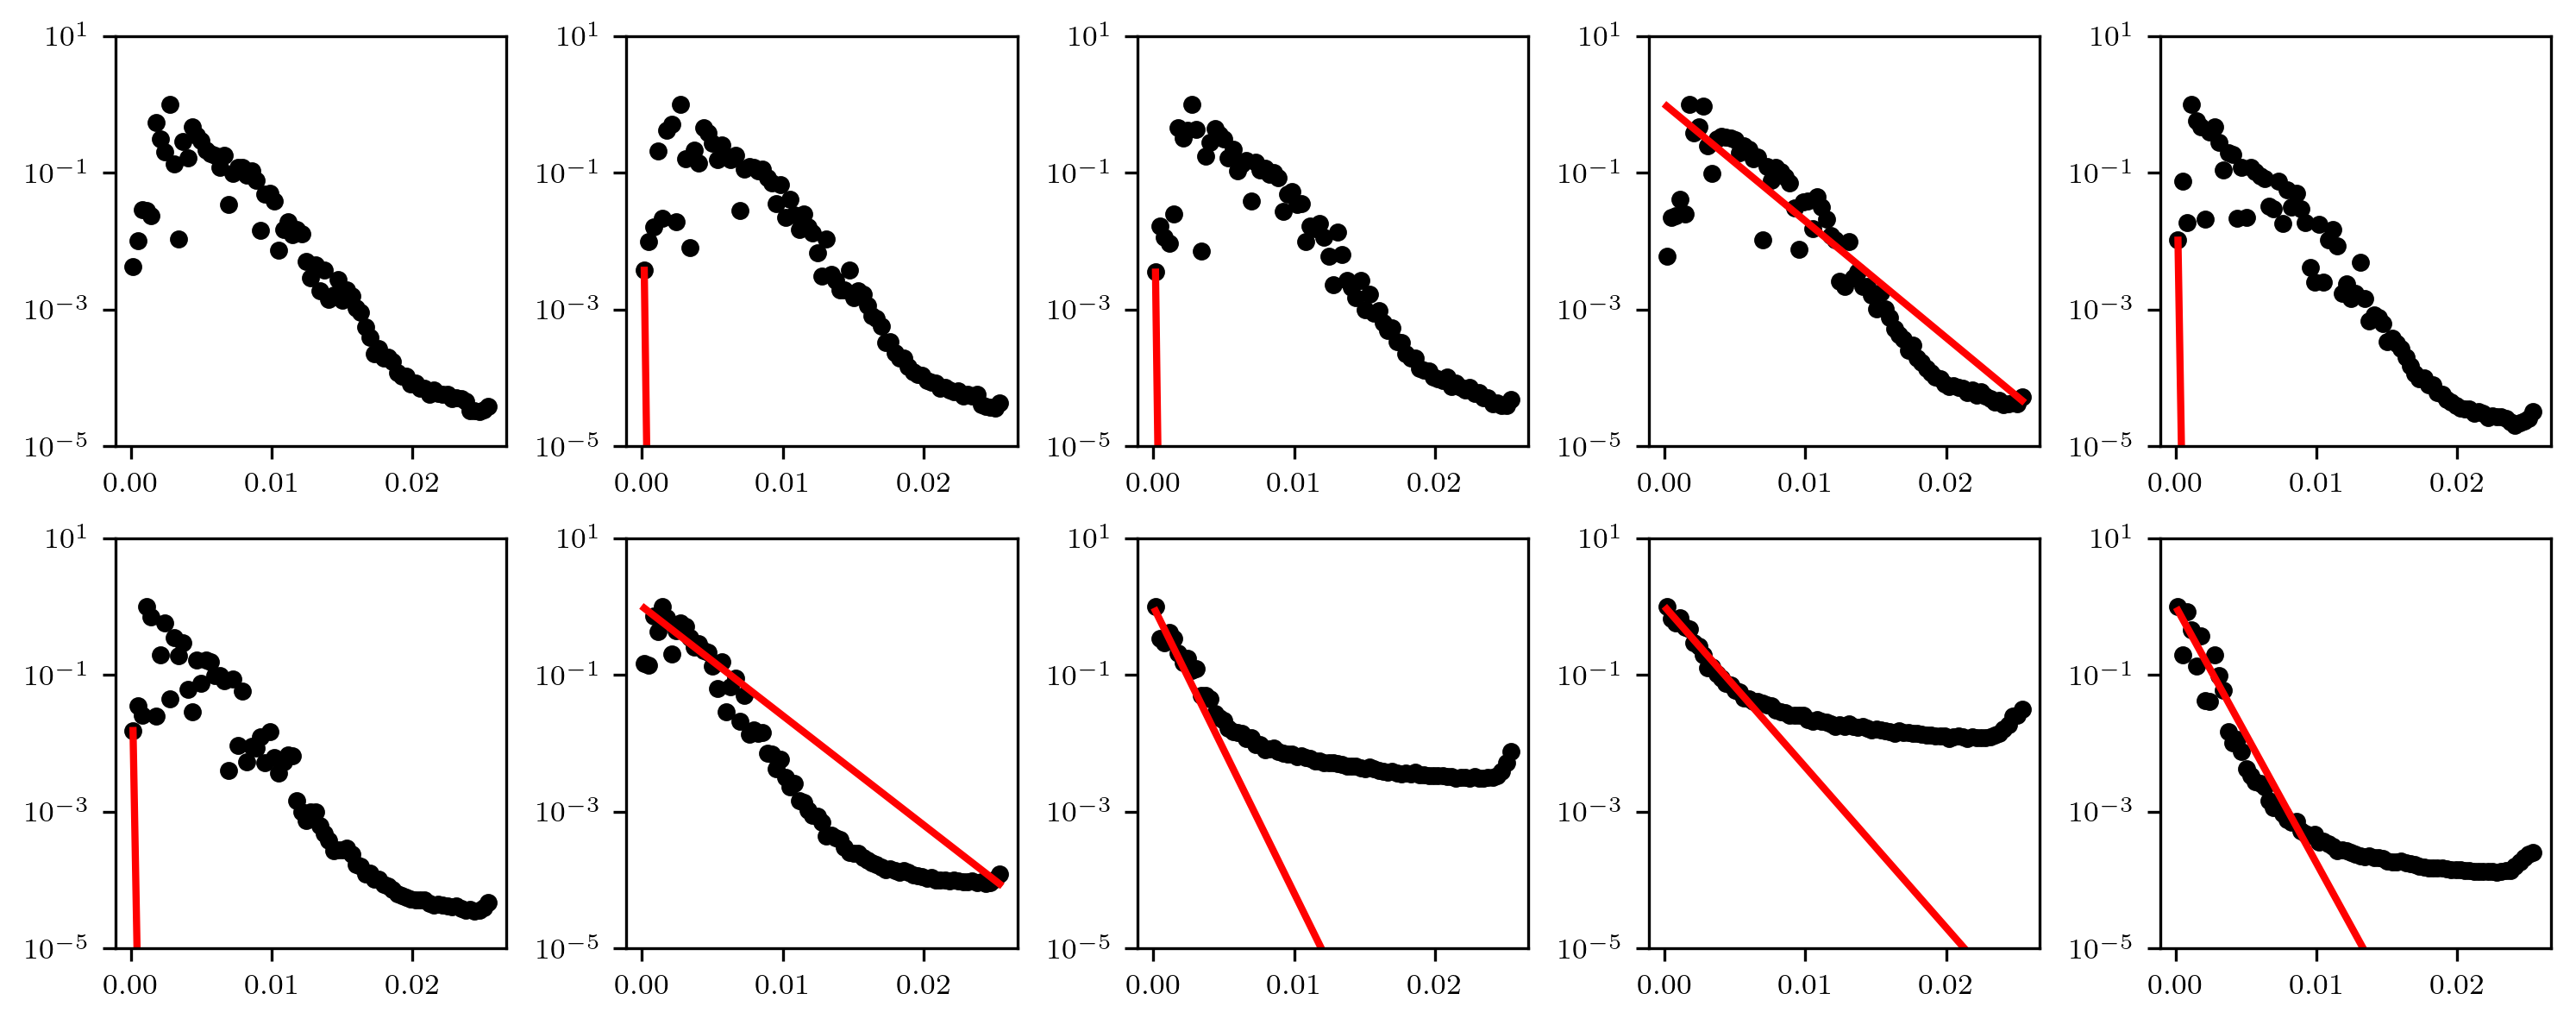

In [60]:
plot_fits(FlatRough_02_14_2022_J_I_profiles,FlatRough_02_14_2022_J_I_fits,FlatRough_02_14_2022_J_z)

### template

In [ ]:
z = FlatRough_02_14_2022_A_z
profiles = FlatRough_02_14_2022_A_I_profiles
fits = FlatRough_02_14_2022_A_I_fits

fig = plt.figure(figsize=(10, 4))

idx = 1

for i in range(10):

    ax = fig.add_subplot(2, 5, idx)

    ax.plot(z,
            profiles[i] / np.nanmax(profiles[i]),
            'ok',
            markersize=ms,
            label='observations')

    ax.plot(z, fits[i], 'r', linewidth=lw, label='fit')

    ax.set_yscale('log')
    
    idx += 1

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/MaterialsBoundaries/Materials/collapsed_correlations.png', bbox_inches='tight')

## Averaging profiles for all realizations at same tw

In [ ]:
FlatRough_tau_profiles = [
    FlatRough_02_14_2022_A_tau_profiles,
    FlatRough_02_14_2022_B_tau_profiles,
    FlatRough_02_14_2022_C_tau_profiles,
    FlatRough_02_14_2022_D_tau_profiles,
    FlatRough_02_14_2022_E_tau_profiles,
    FlatRough_02_14_2022_F_tau_profiles,
    FlatRough_02_14_2022_G_tau_profiles,
    FlatRough_02_14_2022_H_tau_profiles,
    FlatRough_02_14_2022_I_tau_profiles,
    FlatRough_02_14_2022_J_tau_profiles,
]

#indices are [trial: A, B, C, etc.][waiting time, tw]
FlatRough_tau_profiles = np.asarray(FlatRough_tau_profiles)

In [ ]:
# not all the profiles are the same depth -- there is a difference in the length of the vectors by a few metapixels. 
# below i pad all of the vectors with length < than the max length vector with NaN -- then take the horizontal NaN average

In [ ]:
for trial in range(10):
    
    for tw in range(10):
        
        a = FlatRough_tau_profiles[trial][tw]
        
        c = np.empty(81)
        c.fill(np.NaN)
#         c.fill(1e6)
        c[:a.shape[0]] = a
        
        FlatRough_tau_profiles[trial][tw] = c

In [ ]:
#indices are [waiting time, tw][trial: A, B, C, etc.]
FlatRough_tau_profiles = np.swapaxes(FlatRough_tau_profiles,0,1)

In [ ]:
FlatRough_ensemble_tw_mean = np.mean(FlatRough_tau_profiles,axis = 1)

In [ ]:
y_max = len(FlatRough_ensemble_tw_mean[0])

z = np.arange(.5,(y_max),1)
#depth in pixels
z = z*6
#depth in meters
z = z*5.39e-5

## fitting to average

### replacing NaN with 1e6

In [ ]:
for tw in range(len(FlatRough_ensemble_tw_mean)):
    FlatRough_ensemble_tw_mean[tw] = np.nan_to_num(FlatRough_ensemble_tw_mean[tw],nan = 1e6)

### converting to strain rate  and I

In [ ]:
y_max = len(FlatRough_ensemble_tw_mean[0])

z = np.arange(.5,(y_max),1)
#depth in pixels
z = z*6
#depth in meters
FlatRough_ensemble_tw_mean_z = z*5.39e-5

In [ ]:
FlatRough_ensemble_ϵdot_profiles = np.true_divide(ϵ_efold, FlatRough_ensemble_tw_mean)

In [ ]:
FlatRough_ensemble_I_profiles = ϵdot_to_I(FlatRough_ensemble_ϵdot_profiles,
                                              FlatRough_ensemble_tw_mean_z)

In [ ]:
len(FlatRough_ensemble_tw_mean_z)

In [ ]:
fs = 12
y = 10

############################################################
time_cumulative = list(np.logspace(1, 9, num=9, base=2))
time_cumulative.insert(0, 0)

labels = list(time_cumulative)

color = iter(cm.RdYlBu(np.linspace(0, 1, y)))
time = np.arange(1, 101, 1)

fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot(111)

for tw in range(y):
    c = next(color)
    ax1.plot(FlatRough_ensemble_I_profiles[tw][:76],
             FlatRough_ensemble_tw_mean_z[:76],
             'o',
             color=c,
             markersize=3,
             markeredgecolor='k',
             markeredgewidth=0.25,
             alpha=1)

ax1.invert_yaxis()
# ax1.invert_xaxis()

ax1.set_xscale('log')
ax1.set_xlim([1e-14,5e-10])


ax1.set_xlabel(r'I', fontsize=fs)
ax1.set_ylabel(r'z [m]', fontsize=fs)

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/MaterialsBoundaries/PaperFigures/FlatRough_allprofiles.svg', bbox_inches='tight')

## saving inertial numbers

In [ ]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022'
)
np.savez(
    'FlatRough_ensemble_I_profiles',
    data1 = FlatRough_ensemble_I_profiles,
    data2 = FlatRough_ensemble_tw_mean_z)

## fits

In [ ]:
def func(z, l):
    return np.exp(-z / l)


def fit_profile(profile):

    profile = np.asarray(profile)

    tws = profile.shape[0]

    fits = [[] for _ in range(tws)]
    popt = [[] for _ in range(tws)]
    pcov = [[] for _ in range(tws)]
    z_tw = [[] for _ in range(tws)]

    for tw in range(tws):

        ydata = profile[tw]
        ydata = ydata / np.nanmax(ydata)

        y_max = len(ydata)

        z = np.arange(.5, (y_max), 1)
        #depth in pixels
        z = z * 6
        #depth in meters
        z = z * 5.39e-5

        xdata = z

        z_tw[tw] = xdata
        popt[tw], pcov[tw] = curve_fit(func, xdata, ydata, maxfev=10000)
        fits[tw] = func(xdata, *popt[tw])

    return popt, pcov, fits, z_tw

In [ ]:
FlatRough_ensemble_I_popt, FlatRough_ensemble_I_cov, FlatRough_ensemble_I_fits,FlatRough_ensemble_I_z = fit_profile(
    FlatRough_ensemble_I_profiles)

## plotting fits

In [ ]:
z = FlatRough_ensemble_I_z
profiles = FlatRough_ensemble_I_profiles
fits = FlatRough_ensemble_I_fits

fig = plt.figure(figsize=(10, 4))

idx = 1

for i in range(10):

    ax = fig.add_subplot(2, 5, idx)

    ax.plot(z[i],
            profiles[i] / np.nanmax(profiles[i]),
            'ok',
            markersize=ms,
            label='observations')

    ax.plot(z[i], fits[i], 'r', linewidth=lw, label='fit')

    ax.set_yscale('log')
    
    ax.set_ylim([1e-4,1e1])
    
    idx += 1

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/MaterialsBoundaries/Materials/collapsed_correlations.png', bbox_inches='tight')

## collapse

In [ ]:
z = FlatRough_ensemble_I_z
profiles = FlatRough_ensemble_I_profiles
fits = FlatRough_ensemble_I_fits

fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(111)


for i in range(10):


    ax.plot(z[i]/FlatRough_ensemble_I_popt[i],
            profiles[i] / np.nanmax(profiles[i]),
            'ok',
            markersize=ms,
            label='observations')


#     ax.set_yscale('log')

    ax.set_ylim([1e-4, 1e1])
    ax.set_xlim([0, 50])


plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/MaterialsBoundaries/Materials/collapsed_correlations.png', bbox_inches='tight')